Nama  : Laela Hajat Maqbullah
Kelas : DS26
Link github tugas:https://github.com/laela27/Feature-Importance-Analysis-

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression  # Corrected import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

# 1. Load Data Set

In [84]:
# Load dataset
df = pd.read_csv('bank_churn_data.csv')

In [85]:
df

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# 2. EDA Awal

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [87]:
# Menghitung distribusi nilai dalam kolom 'attrition_flag'
attrition_distribution = df['attrition_flag'].value_counts()

# Menampilkan hasil distribusi
print(attrition_distribution)


Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64


In [88]:
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}")  # Menampilkan hingga 10 nilai unik pertama dalam setiap kolom

user_id: [768805383 818770008 713982108 769911858 709106358 713061558 810347208
 818906208 710930508 719661558]
attrition_flag: ['Existing Customer' 'Attrited Customer']
customer_age: [45 49 51 40 44 32 37 48 42 65]
gender: ['M' 'F']
dependent_count: [3 5 4 2 0 1]
education_level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
marital_status: ['Married' 'Single' 'Unknown' 'Divorced']
income_category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
card_category: ['Blue' 'Gold' 'Silver' 'Platinum']
months_on_book: [39 44 36 34 21 46 27 31 54 30]
total_relationship_count: [5 6 4 3 2 1]
months_inactive_12_mon: [1 4 2 3 6 0 5]
contacts_count_12_mon: [3 2 0 1 4 5 6]
credit_limit: [12691.  8256.  3418.  3313.  4716.  4010. 34516. 29081. 22352. 11656.]
total_revolving_bal: [ 777  864    0 2517 1247 2264 1396 1677 1467 1587]
avg_open_to_buy: [11914.  7392.  3418.   796.  4716.  2763. 32252. 27685. 19835.  9979.]
total

# 3. Split Data

In [89]:
# Memisahkan fitur dan target
# Fitur dan target
# Fitur dan target
X = df.drop(columns=['user_id', 'attrition_flag'])
y = df['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Pembagian pertama: pretrain dan test (80% - 20%) dengan stratifikasi
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Pembagian kedua: train dan validation (80% - 20% dari pretrain) dengan stratifikasi
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.20, random_state=42, stratify=y_pretrain)


In [90]:
print(f"Train set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")


Train set shape: (6480, 19), Validation set shape: (1621, 19), Test set shape: (2026, 19)


In [91]:
# Cek missing values di data training
missing_values = X_train.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])



Missing Values:
 Series([], dtype: int64)


In [92]:
# Cek missing values di data training
missing_values = y_train.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 []


In [93]:
y_train.head()

8311     0
10122    0
2847     0
1930     0
351      0
Name: attrition_flag, dtype: int64

In [94]:

# Cek duplikat di data training
duplicate_rows = X_train.duplicated().sum()
print(f"Jumlah duplikat di data training: {duplicate_rows}")

Jumlah duplikat di data training: 0


In [95]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 8311 to 2467
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              6480 non-null   int64  
 1   gender                    6480 non-null   object 
 2   dependent_count           6480 non-null   int64  
 3   education_level           6480 non-null   object 
 4   marital_status            6480 non-null   object 
 5   income_category           6480 non-null   object 
 6   card_category             6480 non-null   object 
 7   months_on_book            6480 non-null   int64  
 8   total_relationship_count  6480 non-null   int64  
 9   months_inactive_12_mon    6480 non-null   int64  
 10  contacts_count_12_mon     6480 non-null   int64  
 11  credit_limit              6480 non-null   float64
 12  total_revolving_bal       6480 non-null   int64  
 13  avg_open_to_buy           6480 non-null   float64
 14  total

In [96]:
# Menghitung jumlah nilai unik di setiap kolom
unique_values_per_column = X_train.nunique()

print(unique_values_per_column)

customer_age                  45
gender                         2
dependent_count                6
education_level                7
marital_status                 4
income_category                6
card_category                  4
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
contacts_count_12_mon          7
credit_limit                4459
total_revolving_bal         1785
avg_open_to_buy             4850
total_amt_chng_q4_q1        1032
total_trans_amt             3927
total_trans_ct               122
total_ct_chng_q4_q1          757
avg_utilization_ratio        927
dtype: int64


In [97]:
for column in X_train.columns:
    print(f"{column}: {X_train[column].unique()[:10]}")  # Menampilkan hingga 10 nilai unik pertama dalam setiap kolom

customer_age: [54 50 36 46 40 44 57 34 47 38]
gender: ['F' 'M']
dependent_count: [2 1 3 4 0 5]
education_level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Doctorate'
 'Post-Graduate']
marital_status: ['Married' 'Single' 'Divorced' 'Unknown']
income_category: ['Unknown' '$40K - $60K' '$120K +' 'Less than $40K' '$60K - $80K'
 '$80K - $120K']
card_category: ['Blue' 'Silver' 'Gold' 'Platinum']
months_on_book: [47 40 28 41 35 33 34 39 36 30]
total_relationship_count: [2 3 6 5 1 4]
months_inactive_12_mon: [3 2 1 6 5 4 0]
contacts_count_12_mon: [3 2 4 1 5 0 6]
credit_limit: [ 1997.  4003.  5260.  2564.  2555.  4969. 15060.  7773.  6543.  2669.]
total_revolving_bal: [   0 1851 1116 2117 1187 2465 2260 1649 1582 1421]
avg_open_to_buy: [ 1997.  2152.  4144.  2564.   438.  3782. 15060.  5308.  4283.  1020.]
total_amt_chng_q4_q1: [0.825 0.703 0.664 1.026 1.049 0.714 0.545 0.788 0.448 0.63 ]
total_trans_amt: [ 4961 15476  2546  2038  1334  3878  1611  4272  1519  4314]
total_trans_

In [98]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['gender','education_level','marital_status','income_category','card_category']

numericals = ['customer_age','dependent_count','months_on_book','total_relationship_count','months_inactive_12_mon',
              'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal','avg_open_to_buy','total_amt_chng_q4_q1',
             'total_trans_amt','total_trans_ct', 'total_ct_chng_q4_q1','avg_utilization_ratio']

In [99]:
# numerical statistical summary
X_train[numericals].describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,46.428549,2.335802,36.056327,3.820679,2.346914,2.463117,8626.834460,1171.415895,7455.418565,0.757999,4382.097685,64.626698,0.712669,0.275444
std,8.040461,1.303189,7.961829,1.550191,1.015404,1.103614,9097.950644,814.103576,9099.108455,0.217941,3390.182379,23.673572,0.240085,0.274699
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,39.000000,0.000000,530.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2559.750000,476.750000,1344.500000,0.628000,2132.000000,44.000000,0.581000,0.026750
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4505.000000,1288.000000,3433.000000,0.733000,3896.500000,67.000000,0.703000,0.179000
75%,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,11047.000000,1787.250000,9774.750000,0.858000,4731.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.355000,17995.000000,139.000000,3.714000,0.984000


In [100]:
# value counts discrete columns=
cols = ['customer_age','dependent_count','months_on_book','total_relationship_count','months_inactive_12_mon',
              'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal','avg_open_to_buy','total_amt_chng_q4_q1',
             'total_trans_amt','total_trans_ct', 'total_ct_chng_q4_q1','avg_utilization_ratio']
for col in cols:
  print(f"Value counts of {col} column")
  print(X_train[col].value_counts(), '\n')

Value counts of customer_age column
46    326
44    315
47    311
49    306
48    296
45    296
43    296
50    282
42    266
53    260
51    260
41    251
52    245
40    234
39    208
38    191
54    185
55    175
56    174
37    170
57    150
36    139
35    117
58    116
59    110
34     94
60     82
33     80
61     65
65     65
32     61
31     54
62     54
30     46
26     46
63     40
29     33
64     28
27     25
28     20
67      2
66      2
68      2
70      1
73      1
Name: customer_age, dtype: int64 

Value counts of dependent_count column
3    1765
2    1692
1    1166
4     979
0     603
5     275
Name: dependent_count, dtype: int64 

Value counts of months_on_book column
36    1603
37     222
34     218
38     216
39     215
40     208
33     205
31     203
35     193
41     186
30     184
32     183
28     182
43     172
42     167
44     161
29     153
45     152
27     133
46     128
48     122
26     117
47     113
24     111
25     103
49      93
23      67
22     

In [101]:
# describe method on categorical data
X_train[categoricals].describe()

,gender,education_level,marital_status,income_category,card_category
count,6480,6480,6480,6480,6480
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,3409,1979,3002,2288,6037


In [102]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(X_train[col].value_counts(), '\n')

Value counts of gender column
F    3409
M    3071
Name: gender, dtype: int64 

Value counts of education_level column
Graduate         1979
High School      1315
Unknown           967
Uneducated        952
College           636
Post-Graduate     336
Doctorate         295
Name: education_level, dtype: int64 

Value counts of marital_status column
Married     3002
Single      2514
Unknown      492
Divorced     472
Name: marital_status, dtype: int64 

Value counts of income_category column
Less than $40K    2288
$40K - $60K       1140
$80K - $120K       964
$60K - $80K        898
Unknown            710
$120K +            480
Name: income_category, dtype: int64 

Value counts of card_category column
Blue        6037
Silver       354
Gold          73
Platinum      16
Name: card_category, dtype: int64 



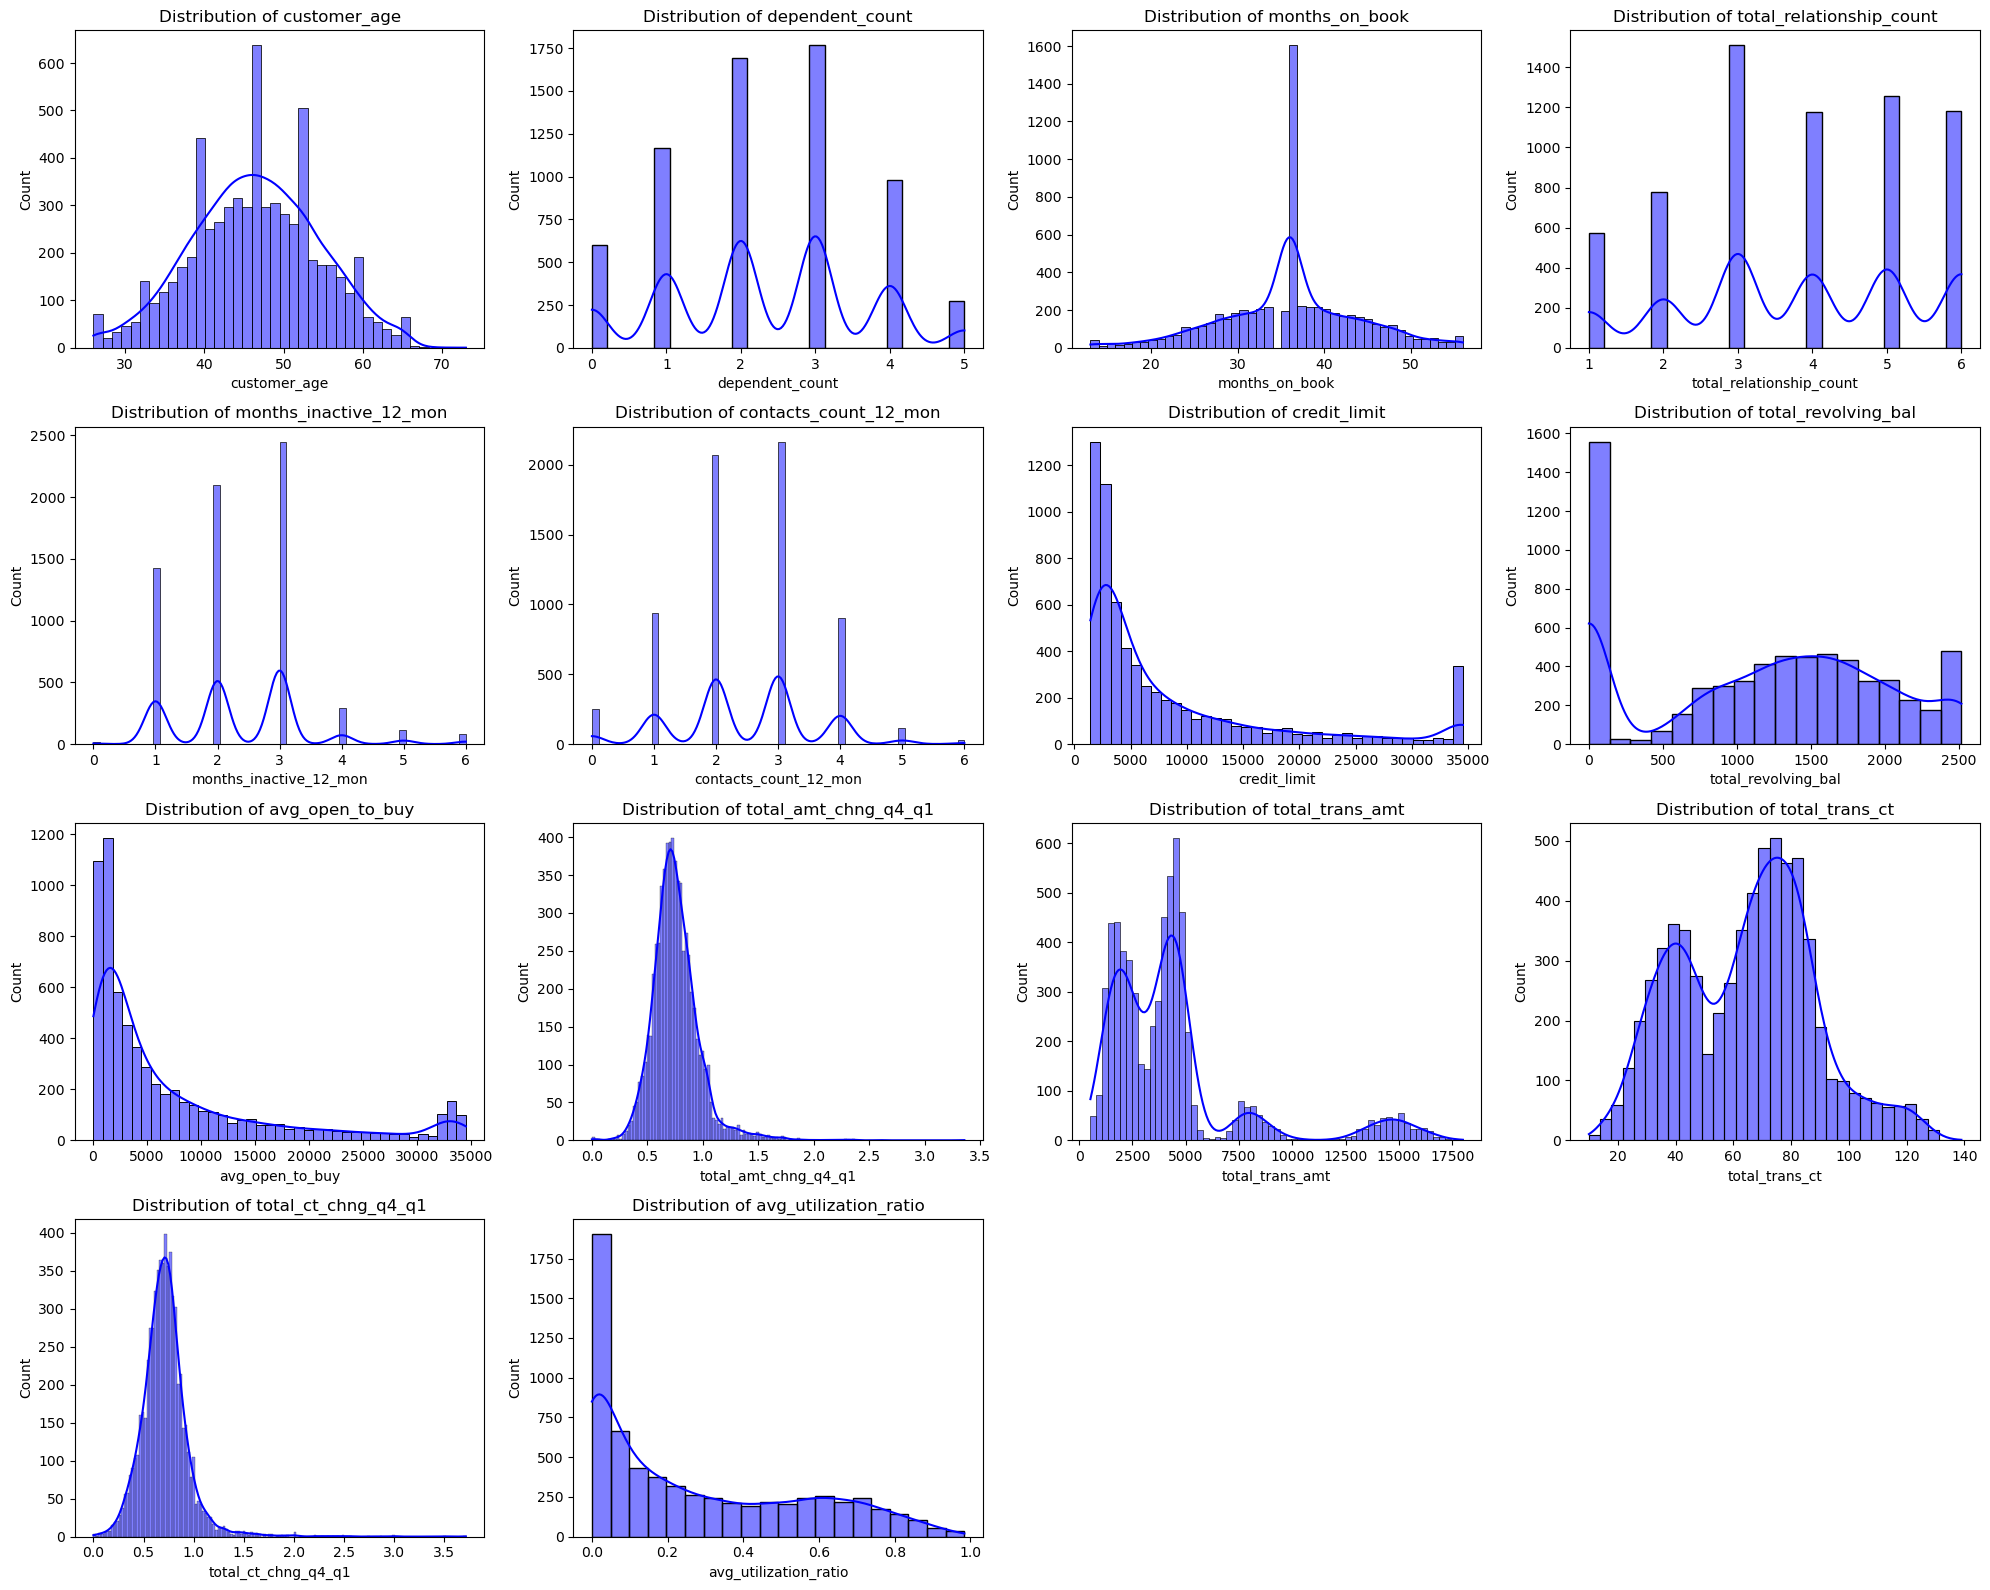

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyesuaikan ukuran figure
plt.figure(figsize=(20, 16))  # Ukuran figure disesuaikan untuk 4 baris dan 4 kolom

# Menentukan jumlah baris dan kolom
n_rows = 4
n_cols = 4

# Plotting univariat untuk kolom numerik
for i in range(len(numericals)):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_train[numericals[i]], kde=True, color='blue')
    plt.title(f'Distribution of {numericals[i]}')
    plt.tight_layout()

plt.show()


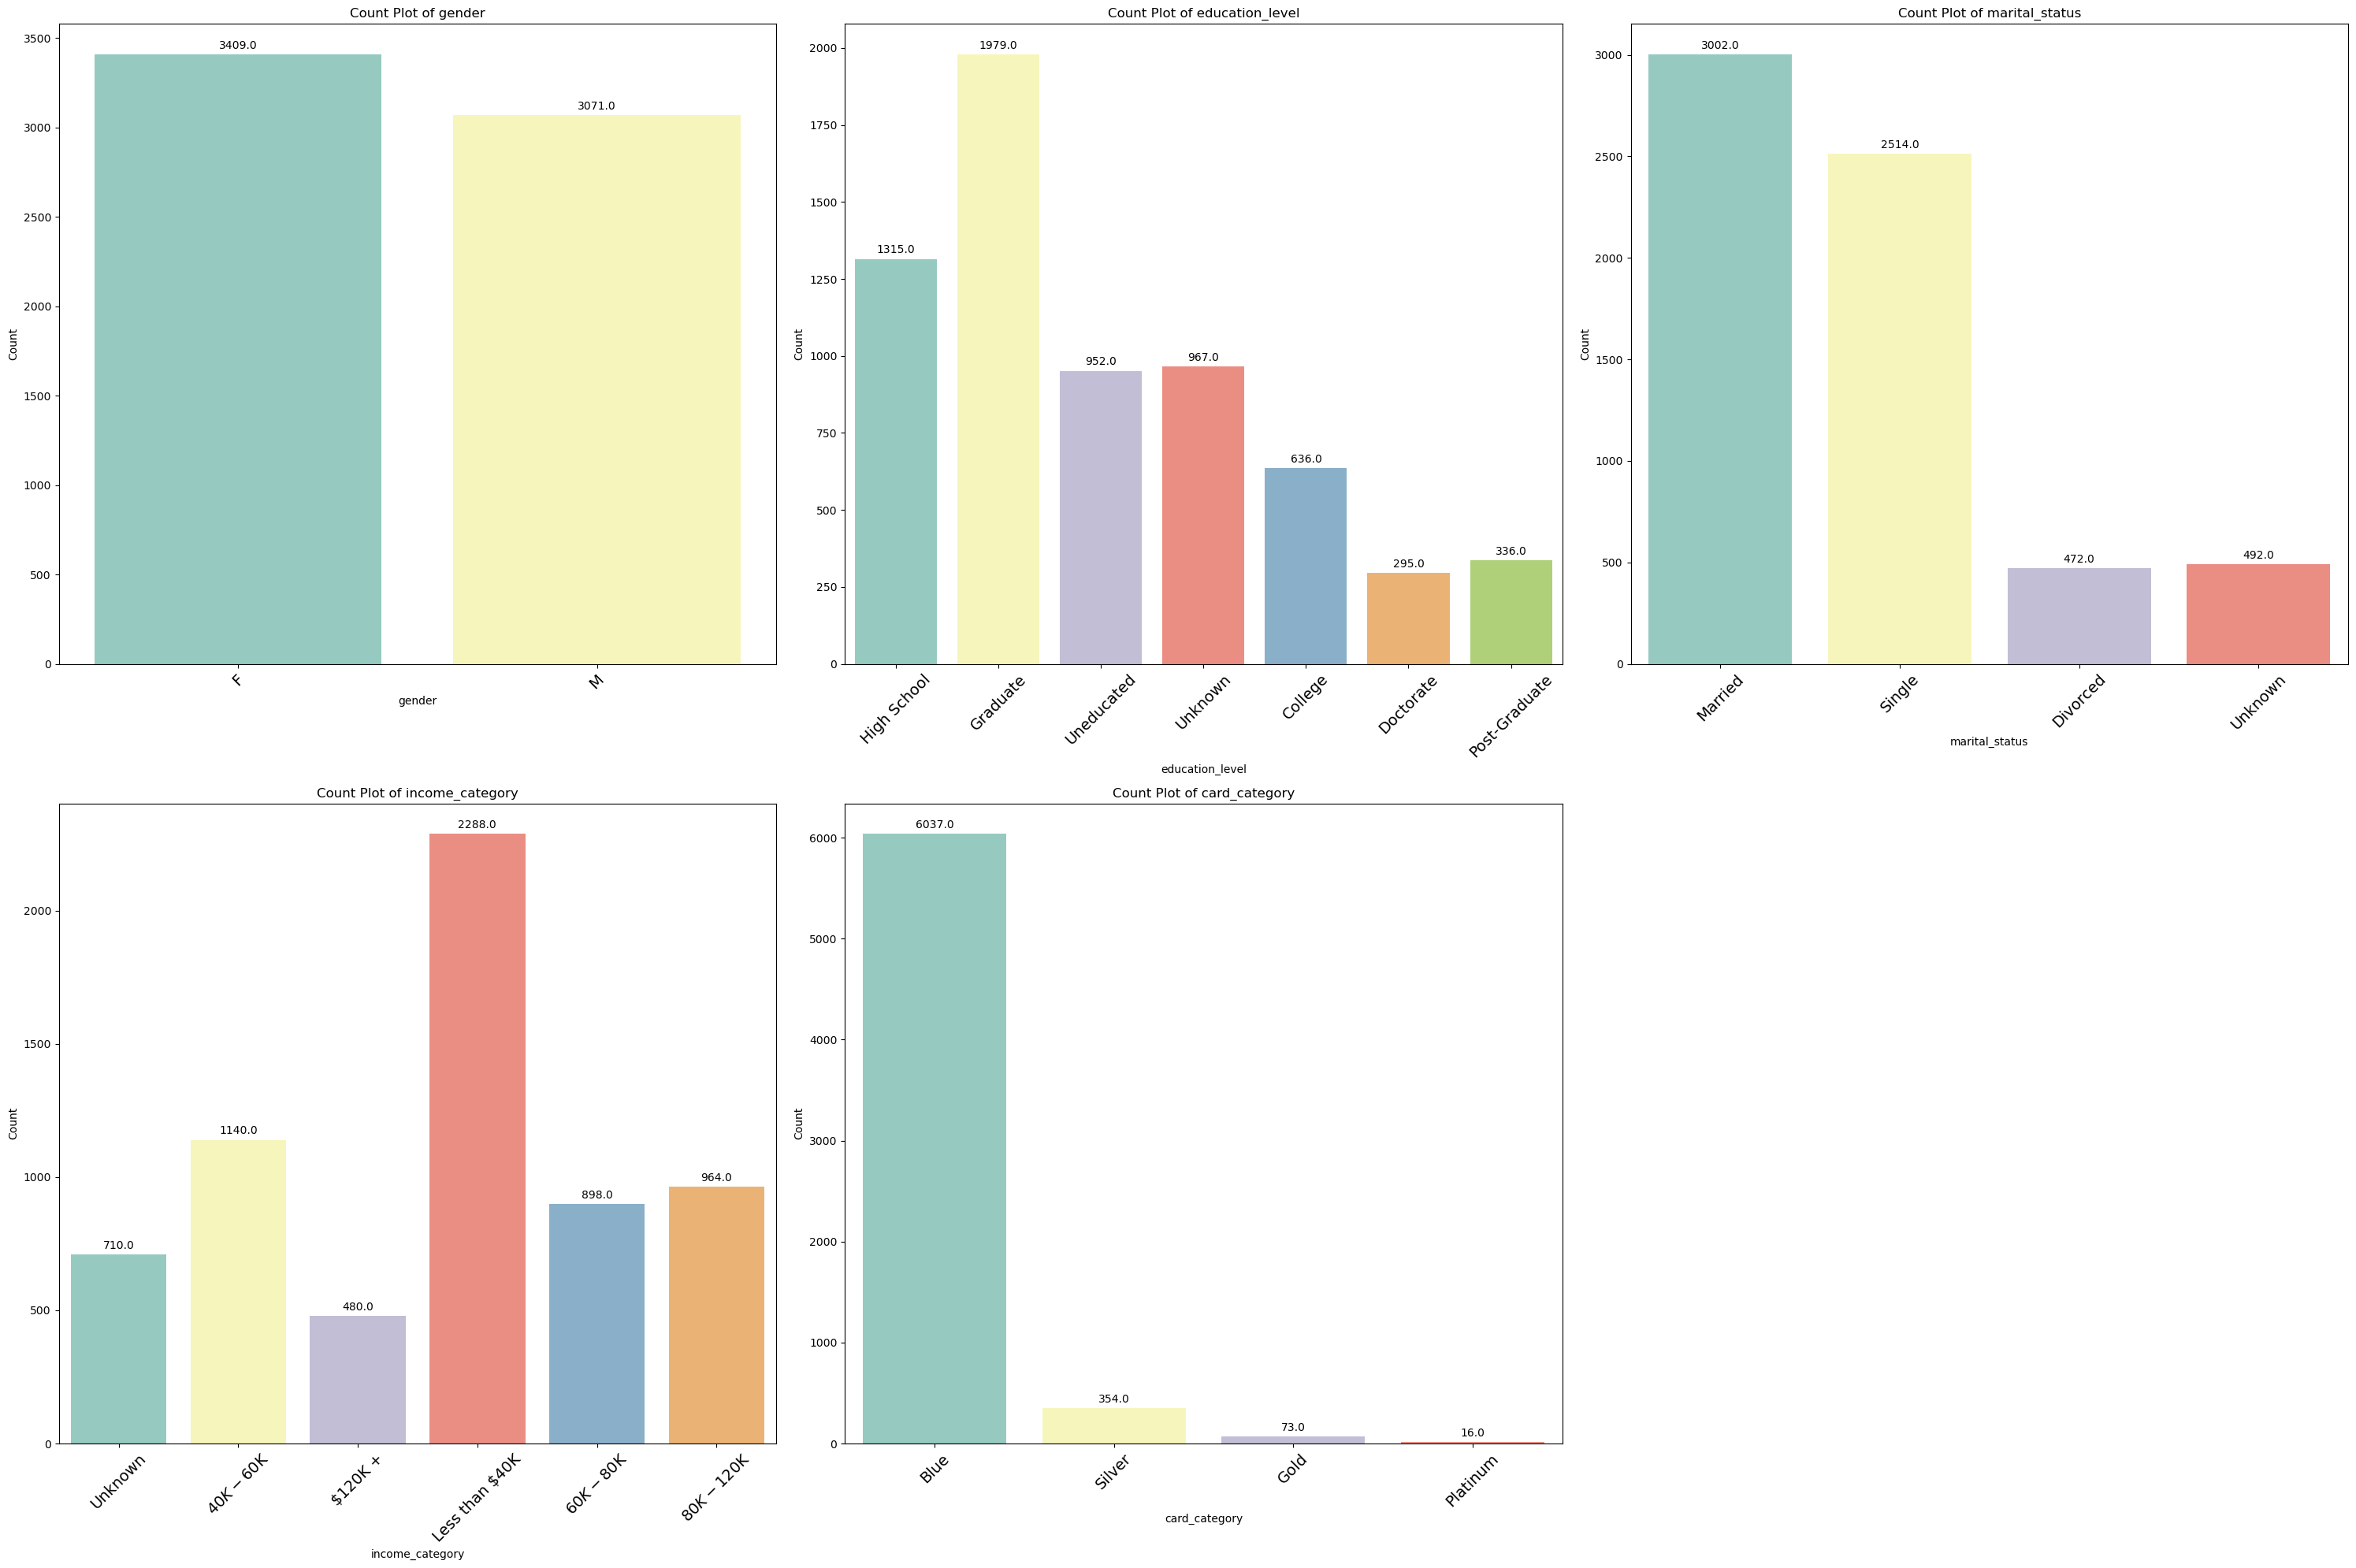

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan jumlah subplot per baris
num_cols = 3
num_rows = (len(categoricals) + num_cols - 1) // num_cols

# Membuat figure dan axes untuk subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 10))
axes = axes.flatten()

# Menampilkan count plot untuk setiap kolom kategorikal
for idx, col in enumerate(categoricals):
    ax = sns.countplot(x=col, data=X_train, palette='Set3', ax=axes[idx])
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Menambahkan rotasi pada label sumbu x untuk lebih terbaca
    ax.tick_params(axis='x', rotation=45, labelsize=14)

    # Anotasi jumlah di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Menghapus axes kosong jika ada
for j in range(len(categoricals), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


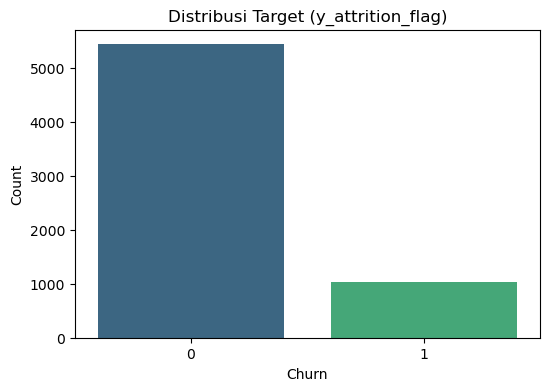

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat countplot untuk y_train tanpa hue
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette="viridis")
plt.title('Distribusi Target (y_attrition_flag)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()




# 4 Deep Dive EDA

### 1.Distribusi Usia Para Nasabah

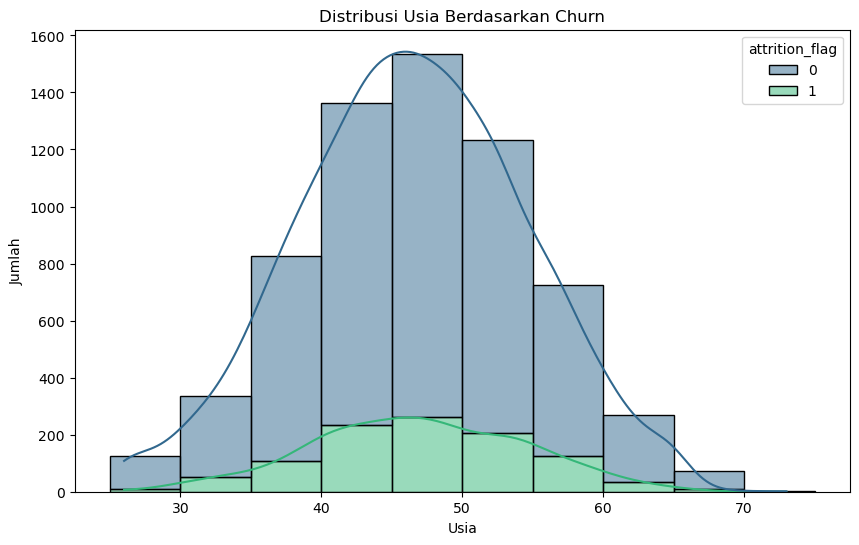

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins from 25 to 75 with increments of 5
bins = np.arange(25, 80, 5)  # Creates bins: [25, 30, 35, ..., 75]

# Plotting the distribution of ages with bins and based on churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='customer_age', hue=y_train, multiple='stack', bins=bins, palette='viridis', kde=True)
plt.title('Distribusi Usia Berdasarkan Churn')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()


berdasarkan grafik diatas usia 45-60 yang paling banyak churn diikuti usia 40-45 dan usia 50-55

### Analisis Churn Berdasarkan Usia 45-60, 40-45, dan 50-55

1. **Usia 45-60 (Paling Banyak Churn)**
   - **Faktor Risiko**: Pengguna usia 45-60 cenderung lebih sensitif terhadap perubahan biaya atau fitur pada platform pembayaran. Mereka lebih mungkin berhenti menggunakan platform jika kebutuhan mereka tidak terpenuhi.

2. **Usia 40-45 dan 50-55 (Churn Signifikan)**
   - **Transisi Kehidupan**: Perubahan karier, rencana pensiun, dan perubahan keluarga pada usia ini dapat memengaruhi perilaku pengguna. Mereka mungkin mencari layanan yang lebih sesuai dengan situasi baru mereka.
   - **Ekspektasi Layanan**: Jika platform tidak dapat memenuhi ekspektasi mereka, pengguna di usia ini cenderung beralih ke layanan lain.

3. **Implikasi untuk Tim Bisnis Divisi Payment**
   - **Segmentasi Pengguna**: Fokus pada segmentasi pengguna berdasarkan usia untuk mengidentifikasi kelompok yang rentan churn dan menawarkan solusi yang lebih personal.
   - **Penyesuaian Layanan**: Sesuaikan fitur atau penawaran platform pembayaran agar lebih sesuai dengan kebutuhan pengguna di kelompok usia ini, seperti layanan yang lebih mudah diakses atau dukungan pelanggan yang lebih responsif.


### 2. Korelasi antara Tingkat Pendidikan dan Income Category

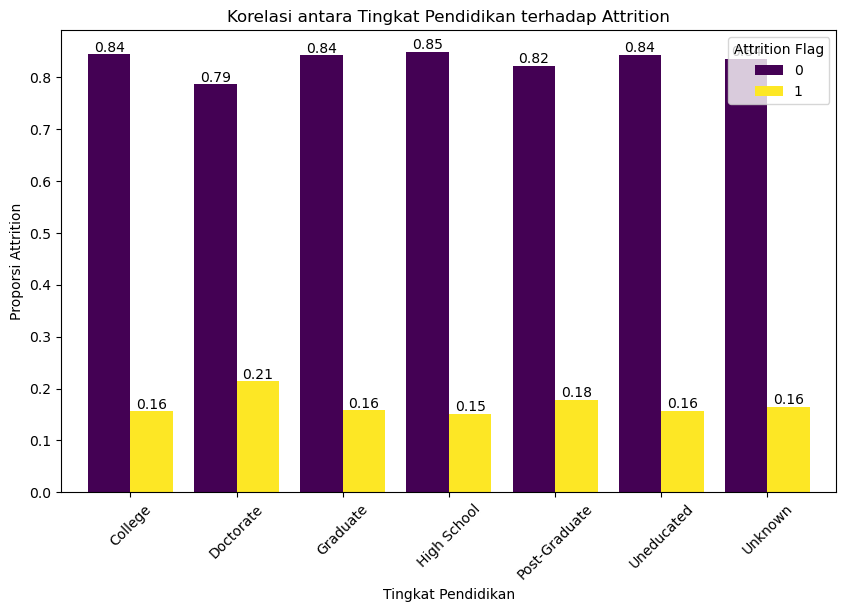

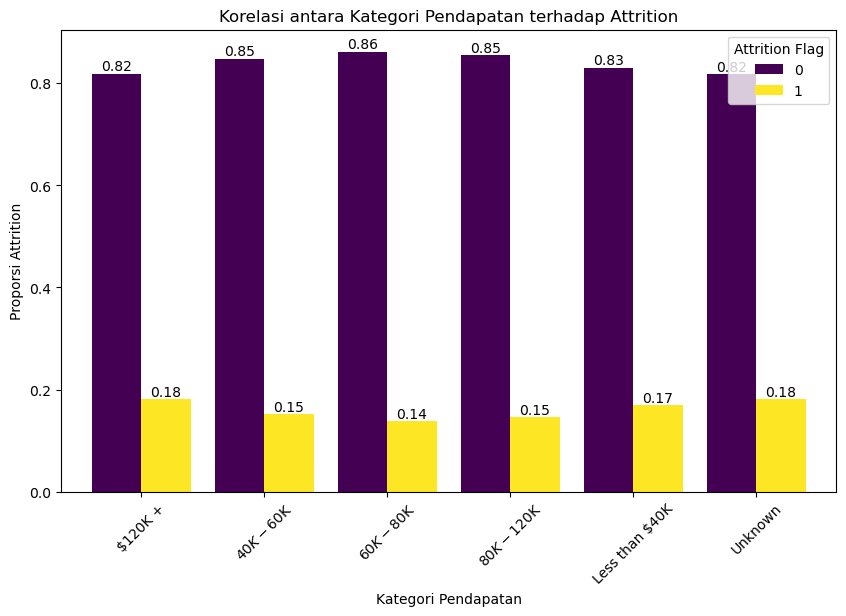

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = X_train.copy()
train_data['attrition_flag'] = y_train

# Crosstab for education level against attrition_flag
edu_attrition = pd.crosstab(index=train_data['education_level'], columns=train_data['attrition_flag'], normalize='index')

# Crosstab for income category against attrition_flag
income_attrition = pd.crosstab(index=train_data['income_category'], columns=train_data['attrition_flag'], normalize='index')

# Function to add numerical labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X coordinate
            height,  # Y coordinate
            f'{height:.2f}',  # Text to display (formatted to 2 decimal places)
            ha='center',  # Horizontal alignment
            va='bottom'   # Vertical alignment
        )

# Plotting crosstab for education level with side-by-side bars
ax = edu_attrition.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Korelasi antara Tingkat Pendidikan terhadap Attrition')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Proporsi Attrition')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', loc='upper right')

# Add labels to each bar in the plot
for bars in ax.containers:
    add_labels(bars)

plt.show()

# Plotting crosstab for income category with side-by-side bars
ax = income_attrition.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Korelasi antara Kategori Pendapatan terhadap Attrition')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Proporsi Attrition')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', loc='upper right')

# Add labels to each bar in the plot
for bars in ax.containers:
    add_labels(bars)

plt.show()


* Berdasarkan grafik diatas proporsi churn pada kategori edukasi yang tinggi proporsi churn nya adalah Doctorate (0,21) diikuti Post Graduate (0,18), dan College, graduate (0,16), uneducated (0,16), unknown (0,16) dengan nilai sama dan yang terendah adalah High school (0,15)
* Berdasarkan grafik diatas proporsi churn pada kategori pedapatan yang tinggi proporsi churn nya adalah 120k+ (0,18), Unknown (0,18),diikuti oleh Less than 40k (0,17), 60k-80k (0,15), 80k-120k (0,15), dan 60k-80k (0,14)

### Analisis Proporsi Churn Berdasarkan Kategori Edukasi dan Pendapatan

1. **Proporsi Churn Berdasarkan Kategori Edukasi**
   - **Doctorate (0,21)**: Pengguna dengan gelar tertinggi (Doctorate) menunjukkan proporsi churn tertinggi. Hal ini mungkin disebabkan oleh ekspektasi layanan yang lebih tinggi atau kebutuhan yang lebih spesifik yang tidak dipenuhi oleh platform.
   - **Post Graduate (0,18)**: Pengguna dengan pendidikan pascasarjana juga memiliki tingkat churn yang cukup tinggi. Mereka mungkin mencari solusi pembayaran yang lebih canggih atau fitur tambahan yang tidak tersedia.
   - **College, Graduate, Uneducated, Unknown (0,16)**: Kategori ini memiliki proporsi churn yang sama, yang mungkin menunjukkan bahwa pendidikan bukan satu-satunya faktor yang mempengaruhi churn di kelompok ini.
   - **High School (0,15)**: Pengguna dengan tingkat pendidikan SMA memiliki proporsi churn terendah, mungkin karena harapan yang lebih rendah terhadap kompleksitas layanan.

2. **Proporsi Churn Berdasarkan Kategori Pendapatan**
   - **120k+ dan Unknown (0,18)**: Pengguna dengan pendapatan tertinggi (120k+) serta mereka yang tidak mengungkapkan pendapatan mereka memiliki proporsi churn tertinggi. Pengguna dengan pendapatan tinggi mungkin mencari layanan premium yang tidak terpenuhi, sedangkan kategori "Unknown" mungkin mencerminkan ketidakpastian dalam preferensi pengguna.
   - **Less than 40k (0,17)**: Pengguna berpenghasilan rendah menunjukkan tingkat churn yang relatif tinggi, mungkin karena sensitivitas terhadap biaya layanan.
   - **60k-80k dan 80k-120k (0,15)**: Pengguna di rentang pendapatan menengah ini memiliki proporsi churn yang lebih rendah, mungkin karena mereka merasa layanan platform sesuai dengan kebutuhan mereka.
   - **60k-80k (0,14)**: Ini adalah kelompok dengan proporsi churn terendah, yang mungkin mencerminkan bahwa layanan yang ditawarkan sesuai dengan harapan dan kebutuhan mereka.

### Kesimpulan
- **Edukasi**: Pengguna dengan pendidikan tinggi cenderung memiliki proporsi churn yang lebih tinggi, yang mungkin terkait dengan ekspektasi layanan yang lebih tinggi atau kebutuhan yang lebih spesifik.
- **Pendapatan**: Pengguna dengan pendapatan tertinggi dan mereka yang tidak mengungkapkan pendapatan mereka menunjukkan proporsi churn yang tinggi, menunjukkan kebutuhan akan layanan yang lebih personal atau eksklusif.

**Strategi**:
- Untuk mengurangi churn pada pengguna dengan pendidikan dan pendapatan tinggi, platform harus mempertimbangkan untuk menawarkan layanan yang lebih personal, fitur tambahan, atau program loyalitas yang lebih eksklusif.


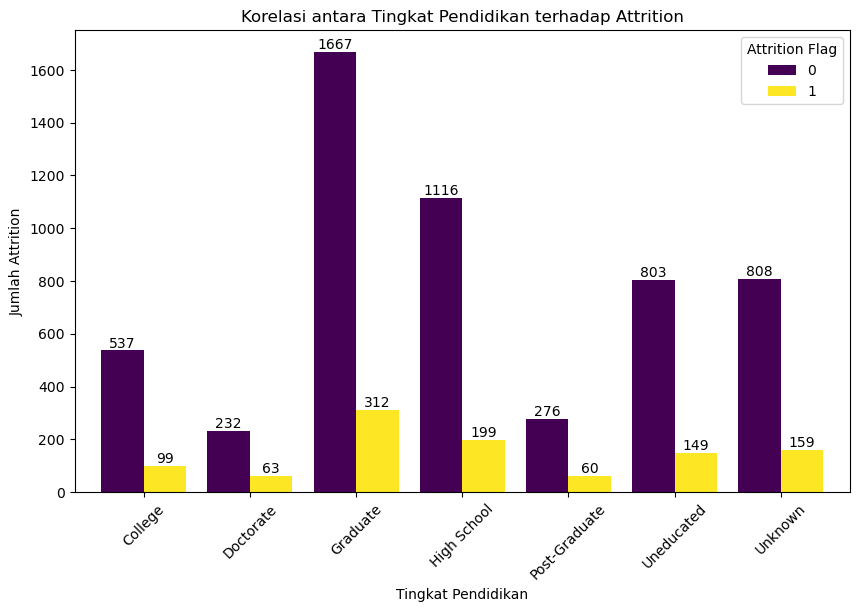

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined

# Combine X_train with y_train (assuming y_train is now 'attrition_flag')
train_data = X_train.copy()
train_data['attrition_flag'] = y_train

# Crosstab for education level against attrition_flag (using raw counts)
edu_attrition = pd.crosstab(index=train_data['education_level'], columns=train_data['attrition_flag'])

# Function to add numerical labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X coordinate
            height,  # Y coordinate
            f'{height:.0f}',  # Text to display (formatted to no decimal places)
            ha='center',  # Horizontal alignment
            va='bottom'   # Vertical alignment
        )

# Plotting crosstab for education level with side-by-side bars
ax = edu_attrition.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Korelasi antara Tingkat Pendidikan terhadap Attrition')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Attrition')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', loc='upper right')

# Add labels to each bar in the plot
for bars in ax.containers:
    add_labels(bars)

plt.show()


berdasarkan grafik jumlah paling banyak churn di kategori pendidikan adalah graduate (312),diikuti High School(199), Unknown(159), uneducated(149),college (99). Doctorate (63), dan post-graduate (60)

### Analisis Jumlah Churn Berdasarkan Kategori Pendidikan

1. **Graduate (312 Churns)**
   - **Faktor Risiko**: Pengguna dengan gelar sarjana (Graduate) memiliki jumlah churn tertinggi. Hal ini mungkin disebabkan oleh adanya ketidaksesuaian antara layanan yang ditawarkan dengan kebutuhan atau harapan pengguna di kelompok ini.

2. **High School (199 Churns)**
   - **Ekspektasi Layanan**: Pengguna dengan pendidikan SMA juga menunjukkan churn yang signifikan. Mereka mungkin mengharapkan layanan yang lebih sederhana atau mudah digunakan, dan jika tidak terpenuhi, mereka cenderung berhenti menggunakan platform.

3. **Unknown (159 Churns)**
   - **Ketidakpastian Preferensi**: Pengguna yang tidak mengungkapkan tingkat pendidikan mereka menunjukkan churn yang cukup tinggi. Ini bisa mencerminkan ketidakpastian dalam preferensi atau ketidaktahuan mereka terhadap manfaat penuh dari layanan yang ditawarkan.

4. **Uneducated (149 Churns)**
   - **Akses dan Pemahaman**: Pengguna tanpa pendidikan formal mungkin mengalami kesulitan dalam menggunakan platform, yang bisa menyebabkan churn lebih tinggi.

5. **College (99 Churns)**
   - **Keinginan untuk Solusi yang Lebih Fleksibel**: Pengguna yang memiliki beberapa pendidikan perguruan tinggi, tetapi belum lulus, mungkin mencari solusi pembayaran yang lebih fleksibel atau sesuai dengan situasi keuangan mereka yang beragam.

6. **Doctorate (63 Churns) dan Post-Graduate (60 Churns)**
   - **Kebutuhan Spesifik**: Pengguna dengan tingkat pendidikan tertinggi menunjukkan jumlah churn yang paling sedikit, meskipun proporsinya tinggi. Ini mungkin karena mereka memiliki kebutuhan yang sangat spesifik atau harapan tinggi yang tidak terpenuhi oleh layanan yang ada.

### Kesimpulan
- **Graduate dan High School**: Dua kelompok ini menyumbang jumlah churn terbesar, yang menunjukkan pentingnya memahami dan menyesuaikan layanan dengan kebutuhan mereka.
- **Strategi**: Untuk mengurangi churn, fokuslah pada penyesuaian layanan untuk pengguna dengan tingkat pendidikan Graduate dan High School. Ini bisa meliputi peningkatan pengalaman pengguna, penawaran layanan yang lebih relevan, atau program loyalitas yang lebih menarik.


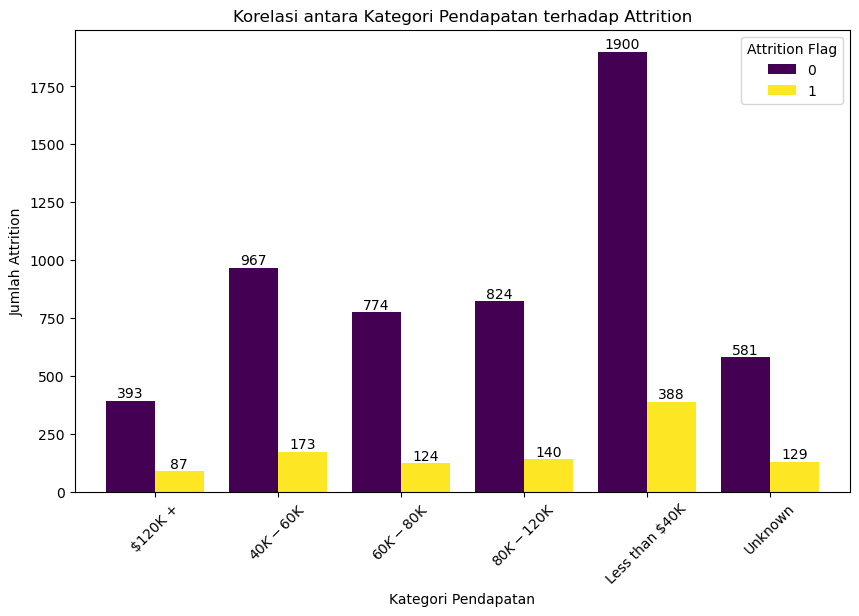

In [111]:
# Crosstab for income category against attrition_flag (using raw counts)
income_attrition = pd.crosstab(index=train_data['income_category'], columns=train_data['attrition_flag'])

# Plotting crosstab for income category with side-by-side bars
ax = income_attrition.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Korelasi antara Kategori Pendapatan terhadap Attrition')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Jumlah Attrition')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', loc='upper right')

# Add labels to each bar in the plot
for bars in ax.containers:
    add_labels(bars)

plt.show()


* Berdasarkan grafik diatas jumlah churn pada kategori pedapatan, yang paling tinggi churn nya adalah Less than 40k (388) diikuti 40k-60k(173), 80k-120k(140), Unknown(129), 60K-80k(124), 120k+ (87)
### Analisis Jumlah Churn Berdasarkan Kategori Pendapatan

1. **Less than 40k (388 Churns)**
   - **Faktor Risiko**: Pengguna dengan pendapatan di bawah 40k memiliki jumlah churn tertinggi. Ini mungkin disebabkan oleh keterbatasan anggaran yang membuat mereka lebih sensitif terhadap biaya dan layanan yang dianggap kurang bernilai.

2. **40k-60k (173 Churns)**
   - **Pendapatan Menengah Rendah**: Kelompok ini juga menunjukkan jumlah churn yang signifikan. Pengguna dengan pendapatan ini mungkin mencari keseimbangan antara kualitas layanan dan biaya, dan jika tidak terpenuhi, mereka cenderung churn.

3. **80k-120k (140 Churns)**
   - **Pendapatan Menengah Tinggi**: Pengguna di kelompok ini mungkin memiliki harapan lebih tinggi terhadap layanan dan cenderung churn jika mereka merasa layanan tidak sesuai dengan ekspektasi mereka.

4. **Unknown (129 Churns)**
   - **Ketidakpastian Preferensi**: Pengguna yang tidak mengungkapkan pendapatan mereka menunjukkan churn yang cukup tinggi. Ini mungkin mencerminkan ketidakpastian dalam kebutuhan atau preferensi layanan mereka.

5. **60k-80k (124 Churns)**
   - **Pendapatan Menengah**: Pengguna dengan pendapatan 60k-80k menunjukkan jumlah churn yang lebih rendah dibandingkan kategori lainnya, yang mungkin menunjukkan bahwa layanan yang ditawarkan lebih cocok dengan harapan mereka.

6. **120k+ (87 Churns)**
   - **Pendapatan Tinggi**: Meskipun proporsi churn cukup tinggi, jumlah churn pada kelompok dengan pendapatan tertinggi adalah yang paling sedikit. Ini bisa disebabkan oleh pengguna yang lebih memilih layanan eksklusif atau mereka yang tetap bertahan karena merasa platform memberikan nilai yang sesuai dengan kebutuhan mereka.

### Kesimpulan
- **Less than 40k**: Pengguna dengan pendapatan di bawah 40k menyumbang jumlah churn terbesar, menunjukkan perlunya pendekatan yang lebih peka terhadap segmen ini, seperti penawaran diskon atau program loyalitas yang lebih menarik.
- **Strategi**: Untuk mengurangi churn, fokuslah pada segmen pengguna dengan pendapatan rendah dan menengah rendah. Ini bisa meliputi penawaran layanan yang lebih terjangkau, peningkatan kualitas layanan, atau personalisasi yang lebih baik untuk memenuhi kebutuhan mereka.


### 3. Perbedaan Signifikan antara Gender dengan Kemungkinan Nasabah untuk Churn

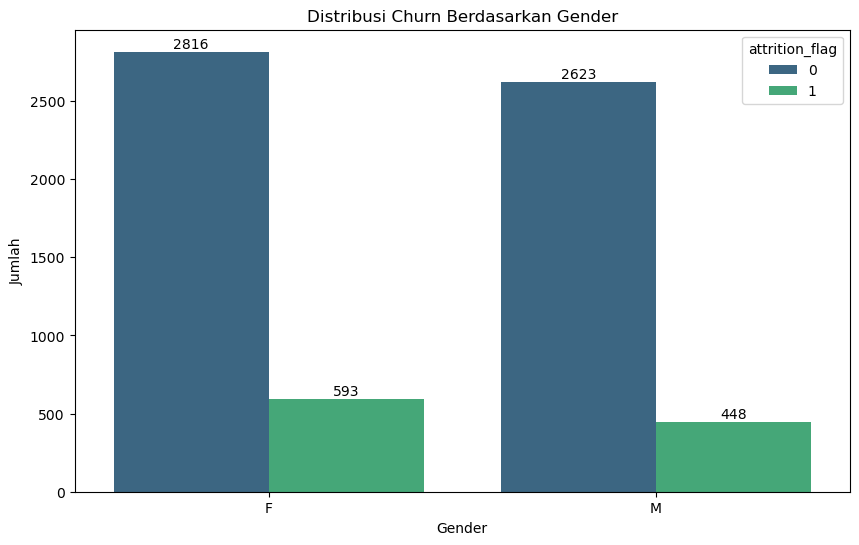

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi churn berdasarkan gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue=y_train, data=X_train, palette='viridis')

# Tambahkan label jumlah angka
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height
    ax.text(x, y + 5, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribusi Churn Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()


Berdasarkan grafik jumlah churn berdasarkan grafik yaitu Female (593) dan Male (448)
### Analisis Jumlah Churn Berdasarkan Gender

1. **Female (593 Churns)**
   - **Faktor Risiko**: Pengguna wanita menunjukkan jumlah churn yang lebih tinggi dibandingkan pria. Hal ini bisa disebabkan oleh beberapa faktor, seperti ketidakpuasan dengan layanan atau kebutuhan yang tidak sepenuhnya dipenuhi oleh platform.
   - **Ekspektasi Layanan**: Mungkin perlu adanya penyesuaian dalam layanan atau fitur yang lebih sesuai dengan kebutuhan dan preferensi pengguna wanita untuk mengurangi churn di segmen ini.

2. **Male (448 Churns)**
   - **Jumlah Churn Lebih Rendah**: Pengguna pria menunjukkan jumlah churn yang lebih rendah dibandingkan wanita. Meskipun mereka juga mengalami churn, jumlahnya tidak sebanyak wanita.
   - **Layanan yang Memadai**: Ini mungkin menunjukkan bahwa layanan atau fitur saat ini lebih sesuai dengan kebutuhan pengguna pria atau bahwa mereka lebih puas dengan pengalaman yang diberikan.

### Kesimpulan
- **Female**: Segmen wanita menyumbang jumlah churn yang lebih tinggi, menandakan bahwa ada kebutuhan untuk mengevaluasi dan mungkin meningkatkan penawaran layanan untuk kelompok ini.
- **Strategi**: Untuk mengurangi churn di segmen wanita, pertimbangkan untuk menyesuaikan layanan atau fitur dengan preferensi spesifik mereka, serta meningkatkan dukungan pelanggan dan program loyalitas yang lebih relevan.


### 4. Korelasi Lama Menjadi Nasabah dengan Kemungkinan Churn

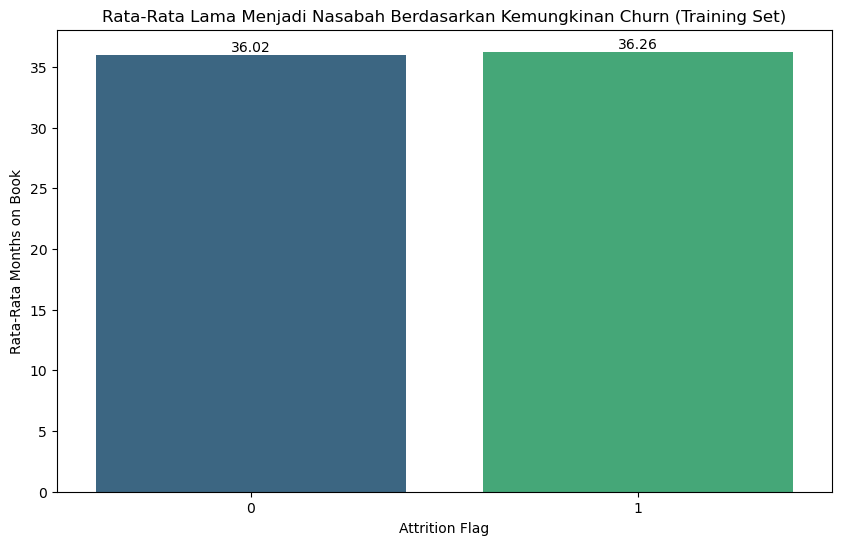

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata 'months_on_book' untuk setiap kategori churn
mean_months_on_book = X_train.groupby(y_train)['months_on_book'].mean().reset_index()
mean_months_on_book.columns = ['Attrition Flag', 'Average Months on Book']

plt.figure(figsize=(10, 6))
# Menggunakan hue untuk membedakan warna antara kategori 0 dan 1
ax = sns.barplot(x='Attrition Flag', y='Average Months on Book', data=mean_months_on_book, hue='Attrition Flag', palette='viridis', dodge=False)

plt.title('Rata-Rata Lama Menjadi Nasabah Berdasarkan Kemungkinan Churn (Training Set)')
plt.xlabel('Attrition Flag')
plt.ylabel('Rata-Rata Months on Book')

# Menambahkan label angka pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Menghilangkan legend karena sudah jelas dari warna dan label
ax.legend_.remove()

plt.show()



Rata-Rata Lama Menjadi Nasabah yang melakukan Churn adalah 36,26 bulan dan yang tidak churn adalah 36,2 bulan

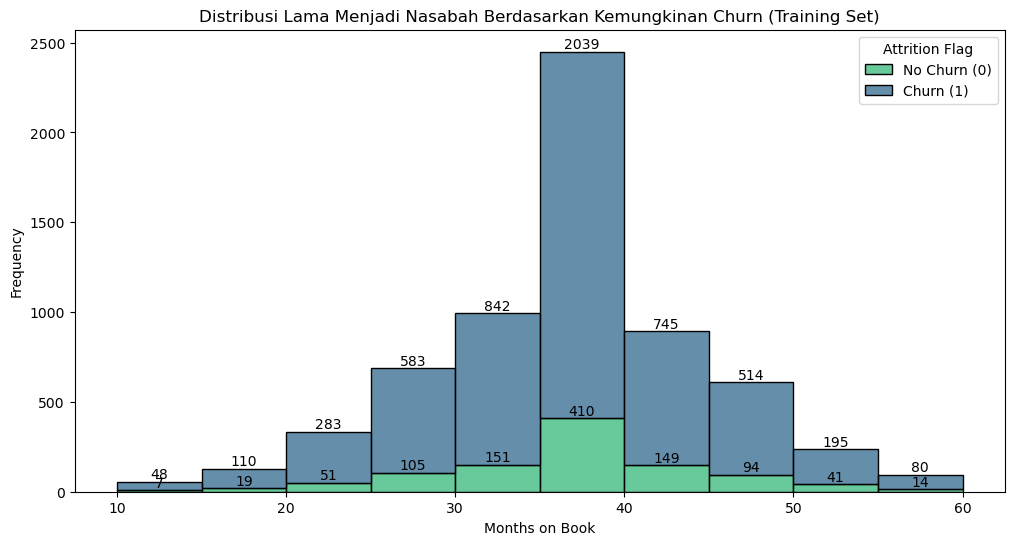

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan batasan rentang dan bin
bins = np.arange(10, 61, 5)  # Bin dengan interval 5 dari 10 hingga 60

plt.figure(figsize=(12, 6))

# Membuat histogram dan menyimpan hasilnya
hist = sns.histplot(data=X_train, x='months_on_book', hue=y_train, bins=bins, multiple='stack', palette='viridis', hue_order=[0, 1])

plt.title('Distribusi Lama Menjadi Nasabah Berdasarkan Kemungkinan Churn (Training Set)')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')

# Menambahkan legend dengan label yang benar
plt.legend(title='Attrition Flag', labels=['No Churn (0)', 'Churn (1)'])

# Menambahkan label jumlah pada setiap bar
for p in hist.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    plt.text(x, y, f'{int(height)}', ha='center', va='bottom')

plt.show()



Rata-Rata Lama Menjadi Nasabah yang paling banyak churn yaitu 35-40 bulan (410)diikuti 30-35 bulan (151) dan 40-45 bulan (149)

### Analisis Korelasi Lama Menjadi Nasabah dengan Kemungkinan Churn

1. **Rata-Rata Lama Menjadi Nasabah**:
   - **Churn**: 36,26 bulan
   - **Tidak Churn**: 36,2 bulan

   Rata-rata lama menjadi nasabah hampir sama antara churn dan tidak churn.

2. **Rentang Lama Menjadi Nasabah dengan Jumlah Churn**:
   - **35-40 bulan**: 410 churn
   - **30-35 bulan**: 151 churn
   - **40-45 bulan**: 149 churn

   Rentang 35-40 bulan memiliki jumlah churn tertinggi, diikuti 30-35 bulan dan 40-45 bulan.

### Kesimpulan

- **Korelasi**: Tidak ada bukti kuat bahwa semakin lama menjadi nasabah berarti kemungkinan churn semakin kecil. Justru, rentang 35-40 bulan menunjukkan churn terbanyak, harus dibuktikan metode lain seperti feature importance di random forest

### 5. Pengaruh Frekuensi Interaksi dengan Bank terhadap Churn

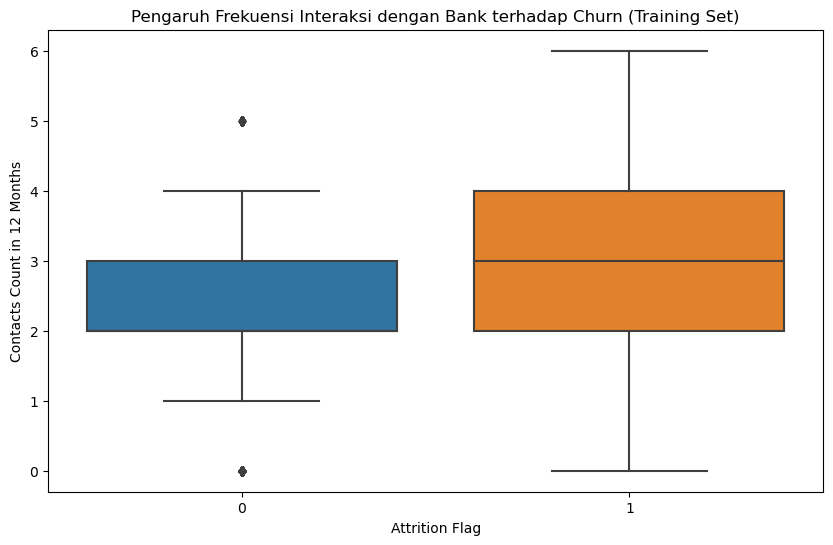

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=X_train['contacts_count_12_mon'])
plt.title('Pengaruh Frekuensi Interaksi dengan Bank terhadap Churn (Training Set)')
plt.xlabel('Attrition Flag')
plt.ylabel('Contacts Count in 12 Months')
plt.show()

Frekuensi Interaksi dengan Bank terhadap Churn. untuk yang tidak churn frekuesinya antara 2-3 kali dan yang churn antara 2-4 kali

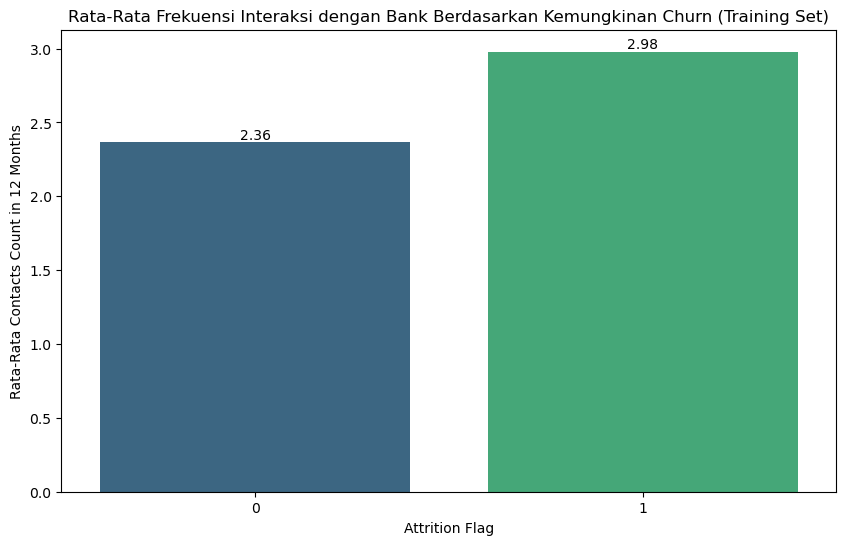

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata 'contacts_count_12_mon' untuk setiap kategori churn
mean_contacts_count = X_train.groupby(y_train)['contacts_count_12_mon'].mean().reset_index()
mean_contacts_count.columns = ['Attrition Flag', 'Average Contacts Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Attrition Flag', y='Average Contacts Count', data=mean_contacts_count, palette='viridis')

plt.title('Rata-Rata Frekuensi Interaksi dengan Bank Berdasarkan Kemungkinan Churn (Training Set)')
plt.xlabel('Attrition Flag')
plt.ylabel('Rata-Rata Contacts Count in 12 Months')

# Menambahkan label angka pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


Rata-Rata Frekuensi Interaksi dengan Bank untuk yang churn 2 kali dan churn 3 kali

### Analisis Frekuensi Interaksi dengan Bank terhadap Churn

1. **Frekuensi Interaksi dengan Bank**:
   - **Tidak Churn**: Frekuensi antara 2-3 kali
   - **Churn**: Frekuensi antara 2-4 kali

   Rata-rata frekuensi interaksi untuk yang churn adalah 2 kali, sedangkan untuk yang tidak churn adalah 3 kali.

2. **Kesimpulan**:
   - **Frekuensi Interaksi dan Churn**: Semakin sering nasabah berinteraksi dengan bank (antara 2-4 kali), ada kemungkinan lebih tinggi untuk churn, meskipun rata-rata frekuensi interaksi untuk yang churn dan tidak churn tidak berbeda jauh.


In [118]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

# Menentukan urutan untuk ordinal encoding
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Inisialisasi encoder ordinal
ordinal_encoder = OrdinalEncoder(categories=[education_order, income_order, card_order])

# Melakukan encoding ordinal pada fitur yang sesuai
X_train[['education_level', 'income_category', 'card_category']] = ordinal_encoder.fit_transform(
    X_train[['education_level', 'income_category', 'card_category']]
)
X_val[['education_level', 'income_category', 'card_category']] = ordinal_encoder.transform(
    X_val[['education_level', 'income_category', 'card_category']]
)
X_test[['education_level', 'income_category', 'card_category']] = ordinal_encoder.transform(
    X_test[['education_level', 'income_category', 'card_category']]
)

# One-Hot Encoding untuk 'gender' dan 'marital_status'
X_train = pd.get_dummies(X_train, columns=['gender', 'marital_status'])
X_val = pd.get_dummies(X_val, columns=['gender', 'marital_status'])
X_test = pd.get_dummies(X_test, columns=['gender', 'marital_status'])

# Menyelaraskan kolom (pastikan semua dataframe memiliki kolom yang sama setelah One-Hot Encoding)
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Melihat hasil preprocessing
print(X_train.head())


       customer_age  dependent_count  education_level  income_category  \
8311             54                2              1.0              5.0   
10122            50                2              3.0              1.0   
2847             36                1              0.0              4.0   
1930             46                3              3.0              1.0   
351              40                3              1.0              0.0   

       card_category  months_on_book  total_relationship_count  \
8311             0.0              47                         2   
10122            0.0              40                         3   
2847             0.0              28                         6   
1930             0.0              41                         5   
351              0.0              35                         3   

       months_inactive_12_mon  contacts_count_12_mon  credit_limit  ...  \
8311                        3                      3        1997.0  ...   
10122   

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan fitur dan target yang telah di-encode
train_encoded_df = pd.concat([X_train, pd.Series(y_train, name='attrition_flag')], axis=1)

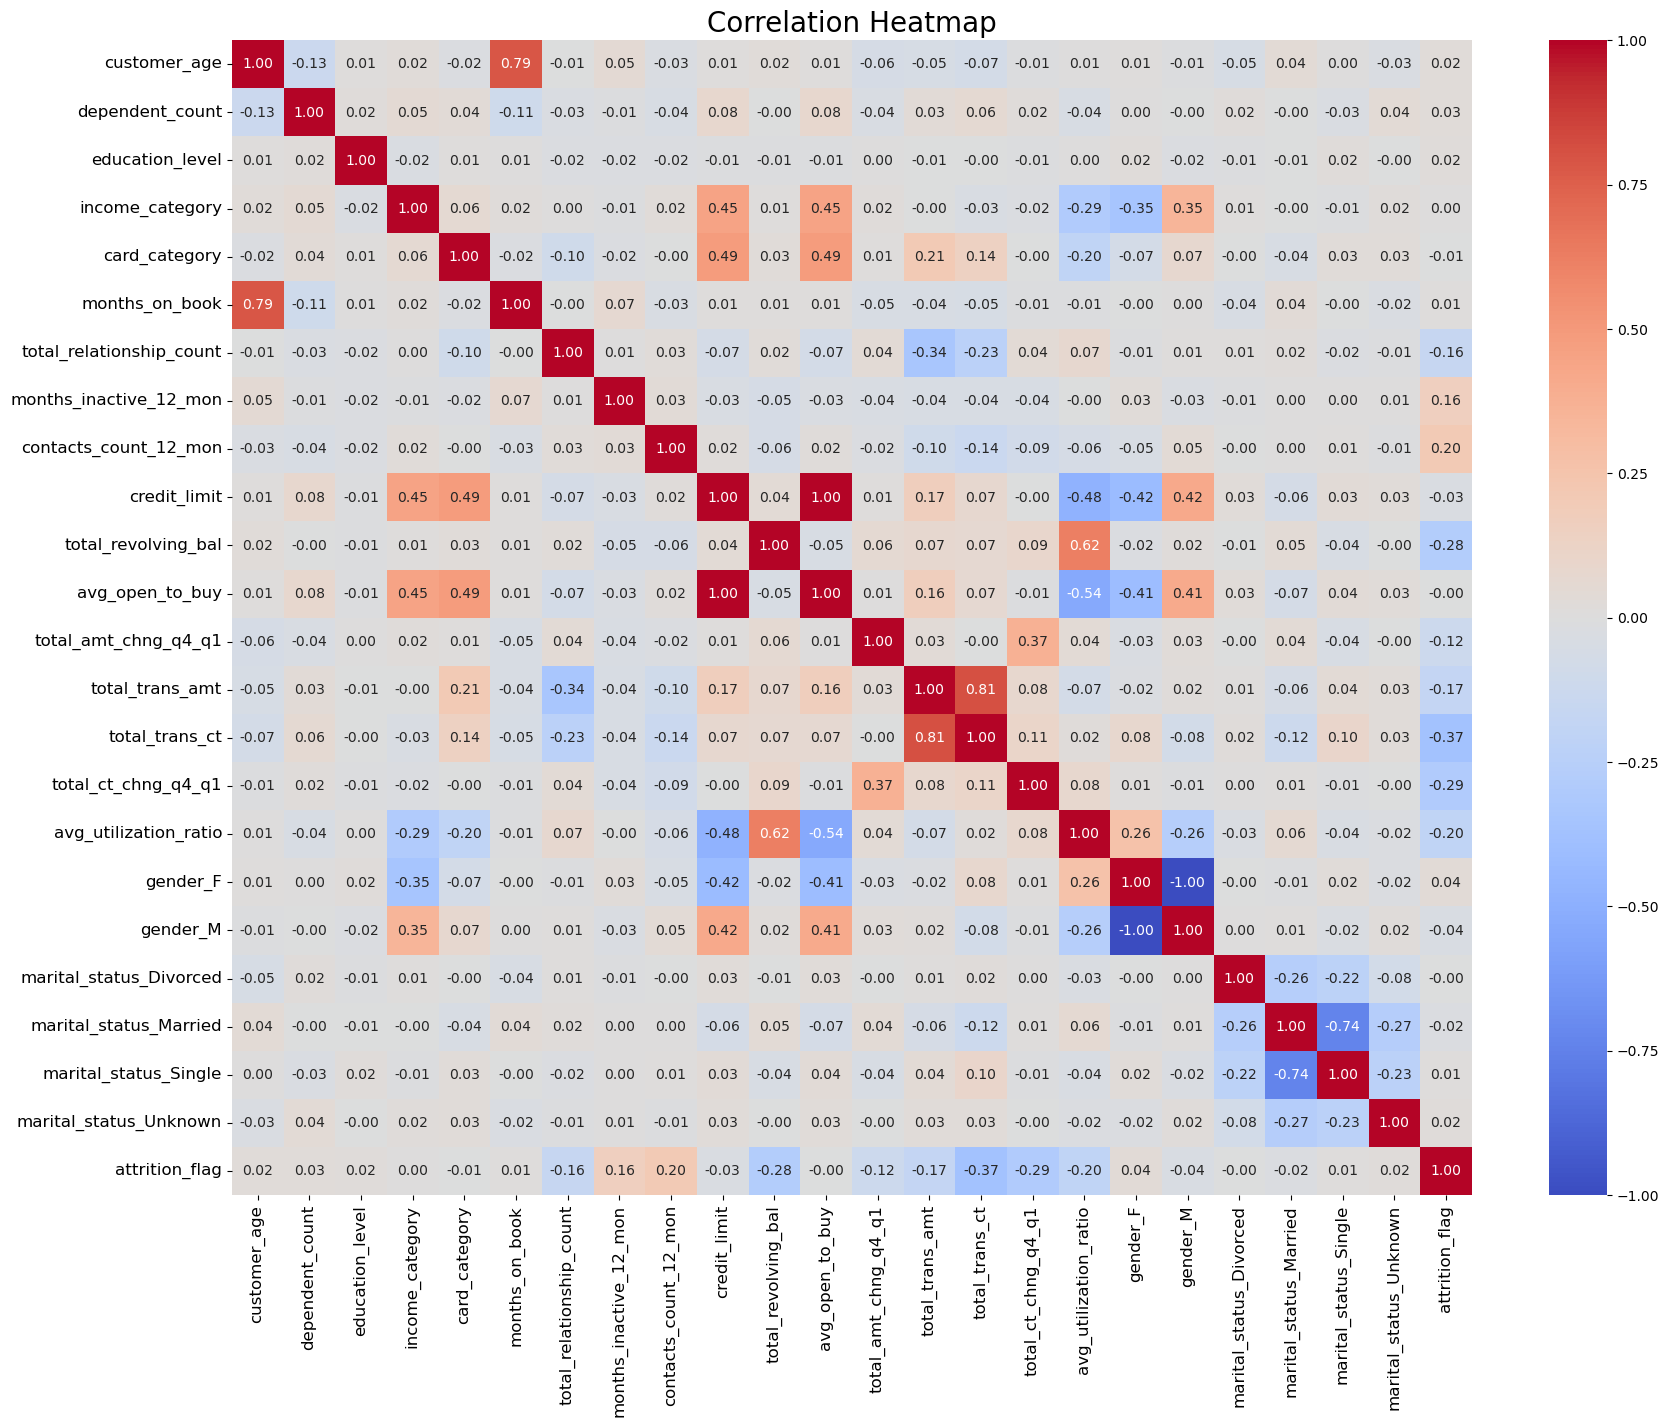

In [120]:
# Hitung matriks korelasi
corr_matrix = train_encoded_df.corr()

# Buat heatmap dengan ukuran yang lebih besar
plt.figure(figsize=(20, 15))  # Memperbesar ukuran gambar
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Menampilkan heatmap
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



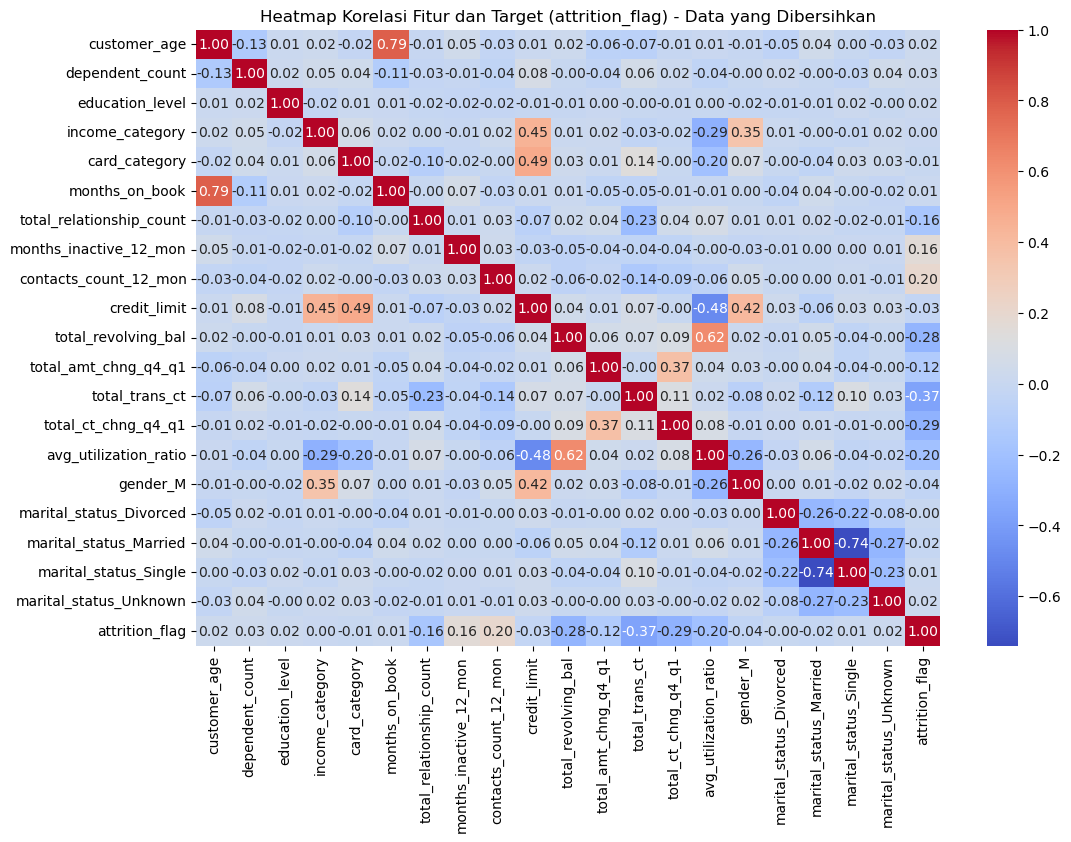

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hapus kolom redundance treshold > 0,8 atau <-0,8
X_train_df = X_train.drop(columns=['gender_F', 'avg_open_to_buy','total_trans_amt'])
X_val_df = X_val.drop(columns=['gender_F', 'avg_open_to_buy','total_trans_amt'])
X_test_df = X_test.drop(columns=['gender_F', 'avg_open_to_buy','total_trans_amt'])

# Ubah y_train_encoded menjadi DataFrame dan beri nama kolom yang sesuai
y_train_df = pd.DataFrame(y_train, columns=['attrition_flag'])

# Gabungkan DataFrame fitur yang sudah di-encode (tanpa kolom yang dihapus) dengan DataFrame target
X_train_combined_cleaned_df = pd.concat([X_train_df, y_train_df], axis=1)

# Hitung korelasi dan buat heatmap untuk data yang sudah dibersihkan
plt.figure(figsize=(12, 8))
correlation_matrix_cleaned = X_train_combined_cleaned_df.corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur dan Target (attrition_flag) - Data yang Dibersihkan')
plt.show()

In [122]:
X_train_df.head()

,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
8311,54,2,1.0,5.0,0.0,47,2,3,3,1997.0,0,0.825,82,0.783,0.000,0,0,1,0,0
10122,50,2,3.0,1.0,0.0,40,3,2,3,4003.0,1851,0.703,117,0.857,0.462,1,0,0,1,0
2847,36,1,0.0,4.0,0.0,28,6,3,2,5260.0,1116,0.664,62,0.879,0.212,1,1,0,0,0
1930,46,3,3.0,1.0,0.0,41,5,2,2,2564.0,0,1.026,45,0.364,0.000,1,0,1,0,0
351,40,3,1.0,0.0,0.0,35,3,1,3,2555.0,2117,1.049,32,0.600,0.829,0,1,0,0,0


# 5. MODELING

## 1. Baseline Model (Dummy Classifier)

In [123]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             f1_score, precision_score, recall_score)


# Inisialisasi DummyClassifier dengan strategy
baseline_model = DummyClassifier(strategy="stratified")
baseline_model.fit(X_train_df, y_train)
baseline_model

DummyClassifier(strategy='stratified')

In [124]:
# Prediksi menggunakan baseline model DummyClassifier pada data pelatihan
y_train_pred_baseline = baseline_model.predict(X_train_df)

# Evaluasi baseline model dengan zero_division parameter pada data pelatihan
print("Classification Report Baseline Model (DummyClassifier) pada data pelatihan:\n", classification_report(y_train, y_train_pred_baseline, zero_division=0))
print("Akurasi Baseline Model (DummyClassifier) pada data pelatihan:", accuracy_score(y_train, y_train_pred_baseline))
print("AUC-ROC Baseline Model (DummyClassifier) pada data pelatihan:", roc_auc_score(y_train, y_train_pred_baseline))
print("F1-Score Baseline Model (DummyClassifier) pada data pelatihan:", f1_score(y_train, y_train_pred_baseline, zero_division=0))
print("Precision Baseline Model (DummyClassifier) pada data pelatihan:", precision_score(y_train, y_train_pred_baseline, zero_division=0))
print("Recall Baseline Model (DummyClassifier) pada data pelatihan:", recall_score(y_train, y_train_pred_baseline, zero_division=0))


Classification Report Baseline Model (DummyClassifier) pada data pelatihan:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      5439
           1       0.15      0.15      0.15      1041

    accuracy                           0.73      6480
   macro avg       0.49      0.49      0.49      6480
weighted avg       0.73      0.73      0.73      6480

Akurasi Baseline Model (DummyClassifier) pada data pelatihan: 0.7271604938271605
AUC-ROC Baseline Model (DummyClassifier) pada data pelatihan: 0.4925898079459216
F1-Score Baseline Model (DummyClassifier) pada data pelatihan: 0.14754098360655735
Precision Baseline Model (DummyClassifier) pada data pelatihan: 0.14811229428848016
Recall Baseline Model (DummyClassifier) pada data pelatihan: 0.14697406340057637


### Evaluasi Model

In [125]:
# Prediksi menggunakan baseline model DummyClassifier
y_val_pred_baseline = baseline_model.predict(X_val_df)

# Evaluasi baseline model dengan zero_division parameter
print("Classification Report Baseline Model (DummyClassifier) pada data validation:\n", classification_report(y_val, y_val_pred_baseline, zero_division=0))
print("Akurasi Baseline Model (DummyClassifier) pada data validation:", accuracy_score(y_val, y_val_pred_baseline))
print("AUC-ROC Baseline Model (DummyClassifier) pada data validation:", roc_auc_score(y_val, y_val_pred_baseline))
print("F1-Score Baseline Model (DummyClassifier) pada data validation:", f1_score(y_val, y_val_pred_baseline, zero_division=0))
print("Precision Baseline Model (DummyClassifier) pada data validation:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall Baseline Model(DummyClassifier) pada data validation:", recall_score(y_val, y_val_pred_baseline, zero_division=0))

Classification Report Baseline Model (DummyClassifier) pada data validation:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1360
           1       0.16      0.15      0.16       261

    accuracy                           0.73      1621
   macro avg       0.50      0.50      0.50      1621
weighted avg       0.73      0.73      0.73      1621

Akurasi Baseline Model (DummyClassifier) pada data validation: 0.7316471314003702
AUC-ROC Baseline Model (DummyClassifier) pada data validation: 0.49795188190218614
F1-Score Baseline Model (DummyClassifier) pada data validation: 0.1553398058252427
Precision Baseline Model (DummyClassifier) pada data validation: 0.15748031496062992
Recall Baseline Model(DummyClassifier) pada data validation: 0.1532567049808429


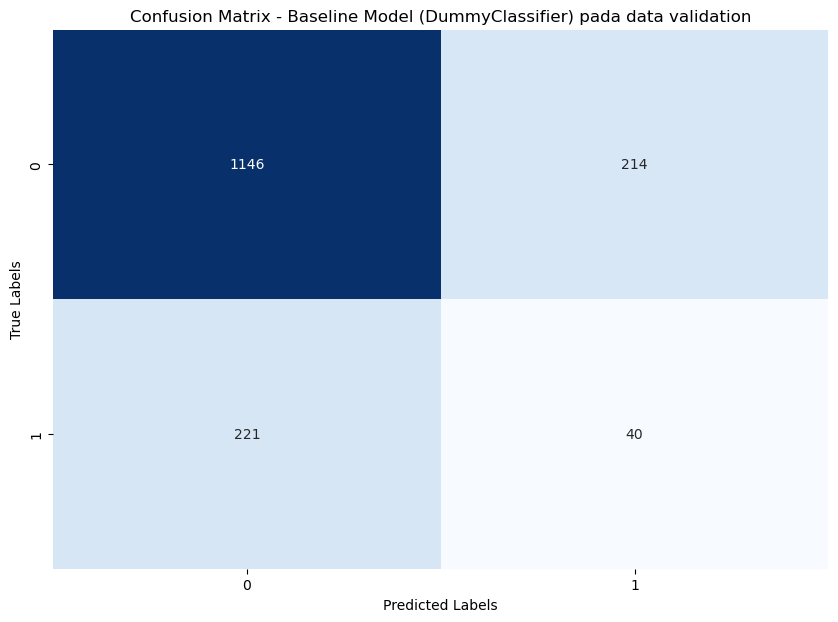

In [126]:
# Confusion Matrix
cm_baseline = confusion_matrix(y_val, y_val_pred_baseline)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Baseline Model (DummyClassifier) pada data validation')
plt.show()

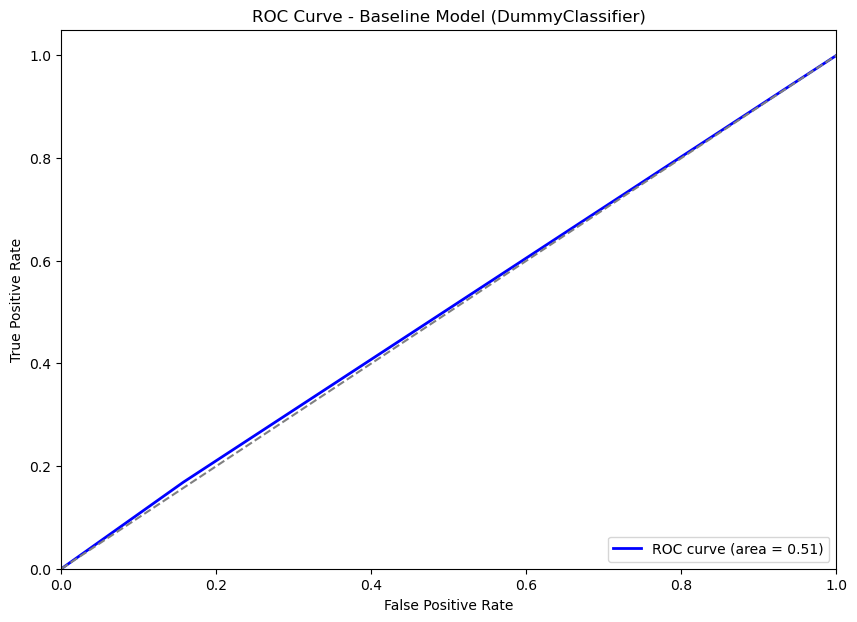

In [127]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi dari baseline model
y_val_prob_baseline = baseline_model.predict_proba(X_val_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr, tpr, _ = roc_curve(y_val, y_val_prob_baseline)
roc_auc_baseline_val = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_baseline_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Model (DummyClassifier)')
plt.legend(loc="lower right")
plt.show()


##  2. LogisticRegression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

# Inisialisasi dan latih model Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_df, y_train)
logreg


LogisticRegression(class_weight='balanced', max_iter=1000)

In [129]:
# Prediksi menggunakan model Logistic Regression pada data pelatihan
y_train_pred_logreg = logreg.predict(X_train_df)

# Evaluasi model Logistic Regression pada data pelatihan
print("Classification Report Logistic Regression pada data pelatihan:\n", classification_report(y_train, y_train_pred_logreg))
print("Akurasi Logistic Regression pada data pelatihan:", accuracy_score(y_train, y_train_pred_logreg))
print("AUC-ROC Logistic Regression pada data pelatihan:", roc_auc_score(y_train, y_train_pred_logreg))
print("F1-Score Logistic Regression pada data pelatihan:", f1_score(y_train, y_train_pred_logreg))
print("Precision Model Logistic Regression pada data pelatihan:", precision_score(y_train, y_train_pred_logreg))
print("Recall Model Logistic Regression pada data pelatihan:", recall_score(y_train, y_train_pred_logreg))


Classification Report Logistic Regression pada data pelatihan:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      5439
           1       0.45      0.81      0.58      1041

    accuracy                           0.81      6480
   macro avg       0.70      0.81      0.73      6480
weighted avg       0.88      0.81      0.83      6480

Akurasi Logistic Regression pada data pelatihan: 0.8111111111111111
AUC-ROC Logistic Regression pada data pelatihan: 0.8113570843089164
F1-Score Logistic Regression pada data pelatihan: 0.579958819492107
Precision Model Logistic Regression pada data pelatihan: 0.45114789108382275
Recall Model Logistic Regression pada data pelatihan: 0.8117195004803074


### Evaluasi Model

In [130]:
# Prediksi menggunakan model Logistic Regression
y_val_pred_logreg = logreg.predict(X_val_df)

# Evaluasi model Logistic Regression
print("Classification Report Logistic Regression pada data validation:\n", classification_report(y_val, y_val_pred_logreg))
print("Akurasi Logistic Regression pada data validation:", accuracy_score(y_val, y_val_pred_logreg))
print("AUC-ROC Logistic Regression pada data validation:", roc_auc_score(y_val, y_val_pred_logreg))
print("F1-Score Logistic Regression pada data validation:", f1_score(y_val, y_val_pred_logreg))
print("Precision Model Logistic Regression pada data validation:", precision_score(y_val, y_val_pred_logreg))
print("Recall Model Logistic Regression pada data validation:", recall_score(y_val, y_val_pred_logreg))

Classification Report Logistic Regression pada data validation:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      1360
           1       0.45      0.80      0.57       261

    accuracy                           0.81      1621
   macro avg       0.70      0.81      0.73      1621
weighted avg       0.87      0.81      0.83      1621

Akurasi Logistic Regression pada data validation: 0.809376927822332
AUC-ROC Logistic Regression pada data validation: 0.8058978476448051
F1-Score Logistic Regression pada data validation: 0.5749656121045392
Precision Model Logistic Regression pada data validation: 0.44849785407725323
Recall Model Logistic Regression pada data validation: 0.8007662835249042


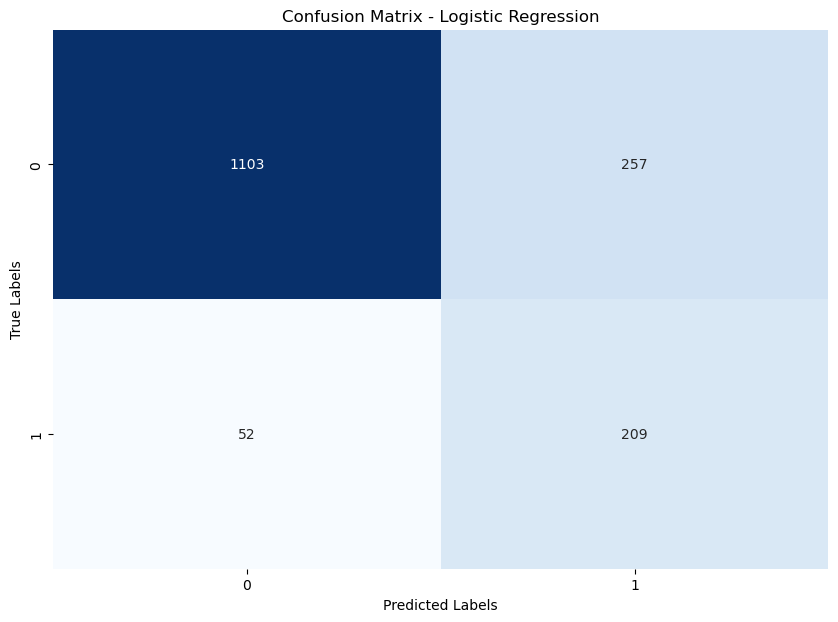

In [131]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


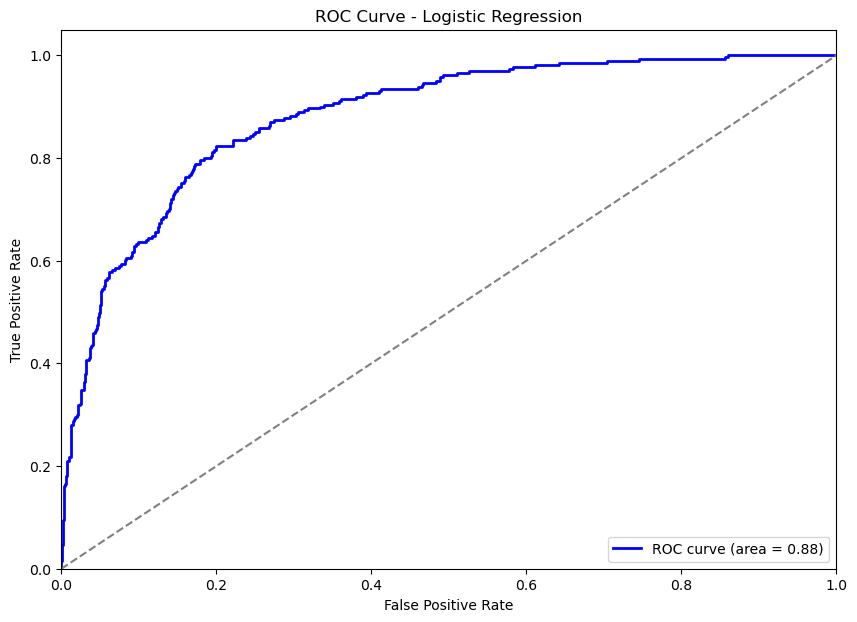

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kurva ROC
y_val_prob_logreg = logreg.predict_proba(X_val_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr, tpr, _ = roc_curve(y_val, y_val_prob_logreg)
roc_auc = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# 3.Model Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, f1_score)

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)  # class_weight='balanced' untuk menangani ketidakseimbangan kelas
rf_model.fit(X_train_df, y_train)
rf_model

RandomForestClassifier(class_weight='balanced', random_state=42)

In [134]:
# Prediksi model pada data pelatihan
y_train_pred_rf = rf_model.predict(X_train_df)

# Evaluasi model Random Forest pada data pelatihan
print("Classification Report Random Forest pada data pelatihan:\n", classification_report(y_train, y_train_pred_rf))
print("Akurasi Random Forest pada data pelatihan:", accuracy_score(y_train, y_train_pred_rf))
print("AUC-ROC Random Forest pada data pelatihan:", roc_auc_score(y_train, y_train_pred_rf))
print("F1-Score Random Forest pada data pelatihan:", f1_score(y_train, y_train_pred_rf))
print("Precision Model Random Forest pada data pelatihan:", precision_score(y_train, y_train_pred_rf))
print("Recall Model Random Forest pada data pelatihan:", recall_score(y_train, y_train_pred_rf))


Classification Report Random Forest pada data pelatihan:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5439
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480

Akurasi Random Forest pada data pelatihan: 1.0
AUC-ROC Random Forest pada data pelatihan: 1.0
F1-Score Random Forest pada data pelatihan: 1.0
Precision Model Random Forest pada data pelatihan: 1.0
Recall Model Random Forest pada data pelatihan: 1.0


### Evaluasi Model

In [135]:
# Prediksi model pada validation set
y_val_pred_rf = rf_model.predict(X_val_df)

# Evaluasi model Random Forest
print("Classification Report Random Forest pada data validation:\n", classification_report(y_val, y_val_pred_rf))
print("Akurasi Random Forest pada data validation:", accuracy_score(y_val, y_val_pred_rf))
print("AUC-ROC Random Forest pada data validation:", roc_auc_score(y_val, y_val_pred_rf))
print("F1-Score Random Forest pada data validation:", f1_score(y_val, y_val_pred_rf))
print("Precision Model Random Forest pada data validation:", precision_score(y_val, y_val_pred_rf))
print("Recall Model Random Forest pada data validation:", recall_score(y_val, y_val_pred_rf))

Classification Report Random Forest pada data validation:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1360
           1       0.87      0.62      0.73       261

    accuracy                           0.92      1621
   macro avg       0.90      0.80      0.84      1621
weighted avg       0.92      0.92      0.92      1621

Akurasi Random Forest pada data validation: 0.9247378161628624
AUC-ROC Random Forest pada data validation: 0.8034370069867026
F1-Score Random Forest pada data validation: 0.7276785714285714
Precision Model Random Forest pada data validation: 0.8716577540106952
Recall Model Random Forest pada data validation: 0.6245210727969349


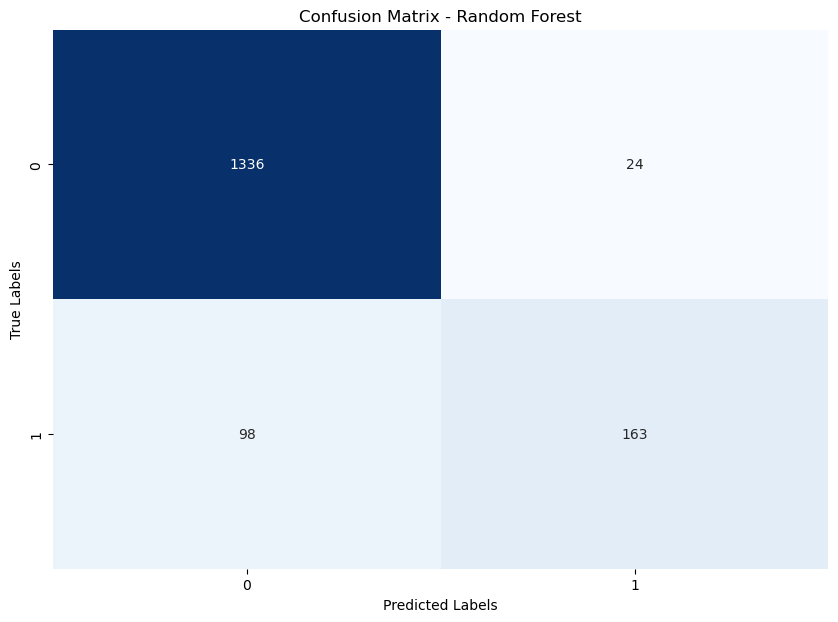

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_rf_val = confusion_matrix(y_val, y_val_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


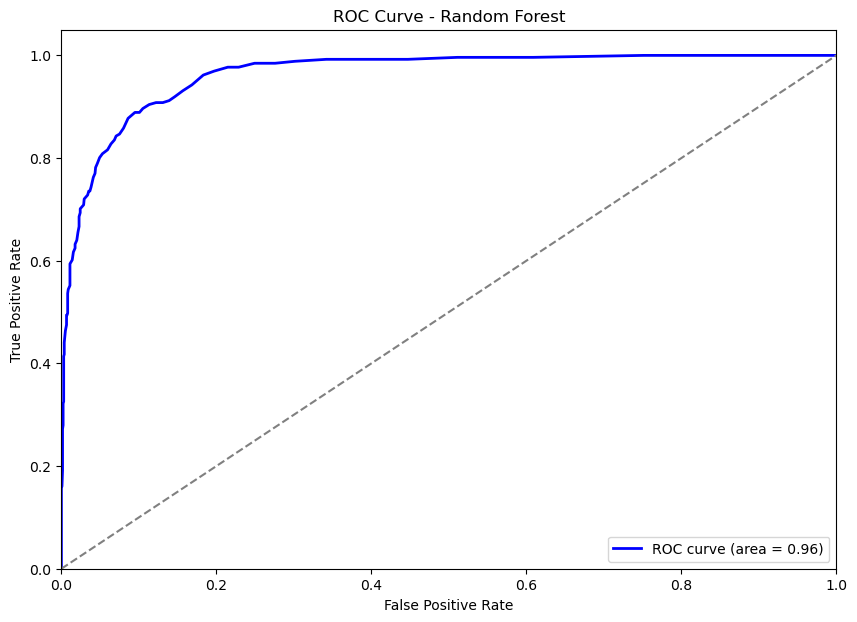

In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kurva ROC
y_val_prob_rf = rf_model.predict_proba(X_val_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_rf_val = auc(fpr_rf, tpr_rf)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


## 4. Model SVC

In [138]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, f1_score)

# Membuat dan melatih model SVM dengan class_weight
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)  # class_weight='balanced' untuk menangani ketidakseimbangan kelas
svm_model.fit(X_train_df, y_train)
svm_model

SVC(class_weight='balanced', probability=True, random_state=42)

In [139]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             f1_score, precision_score, recall_score)

# Membuat dan melatih model SVM dengan class_weight
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_df, y_train)

# Prediksi model pada data pelatihan
y_train_pred_svm = svm_model.predict(X_train_df)

# Evaluasi model SVM pada data pelatihan
print("Classification Report SVM pada data pelatihan:\n", classification_report(y_train, y_train_pred_svm))
print("Akurasi SVM pada data pelatihan:", accuracy_score(y_train, y_train_pred_svm))
print("AUC-ROC SVM pada data pelatihan:", roc_auc_score(y_train, y_train_pred_svm))
print("F1-Score SVM pada data pelatihan:", f1_score(y_train, y_train_pred_svm))
print("Precision SVM pada data pelatihan:", precision_score(y_train, y_train_pred_svm))
print("Recall SVM pada data pelatihan:", recall_score(y_train, y_train_pred_svm))


Classification Report SVM pada data pelatihan:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      5439
           1       0.34      0.69      0.46      1041

    accuracy                           0.74      6480
   macro avg       0.64      0.72      0.64      6480
weighted avg       0.83      0.74      0.77      6480

Akurasi SVM pada data pelatihan: 0.7391975308641975
AUC-ROC SVM pada data pelatihan: 0.7195826067789839
F1-Score SVM pada data pelatihan: 0.45971867007672634
Precision SVM pada data pelatihan: 0.3445136559655007
Recall SVM pada data pelatihan: 0.6906820365033621


### Evaluasi Model

In [140]:
# Prediksi model pada validation set
y_val_pred_svm = svm_model.predict(X_val_df)

# Evaluasi model SVM
print("Classification SVM pada data validation:\n", classification_report(y_val, y_val_pred_svm))
print("Akurasi SVM pada data validation:", accuracy_score(y_val, y_val_pred_svm))
print("AUC-ROC SVM pada data validation:", roc_auc_score(y_val, y_val_pred_svm))
print("F1-Score SVM pada data validation:", f1_score(y_val, y_val_pred_svm))
print("Precision SVM pada data validation:", precision_score(y_val, y_val_pred_svm))
print("Recall SVM pada data validation:", recall_score(y_val, y_val_pred_svm))

Classification SVM pada data validation:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1360
           1       0.32      0.65      0.42       261

    accuracy                           0.72      1621
   macro avg       0.62      0.69      0.62      1621
weighted avg       0.82      0.72      0.75      1621

Akurasi SVM pada data validation: 0.7174583590376311
AUC-ROC SVM pada data validation: 0.689195965742619
F1-Score SVM pada data validation: 0.4246231155778895
Precision SVM pada data validation: 0.31588785046728973
Recall SVM pada data validation: 0.6475095785440613


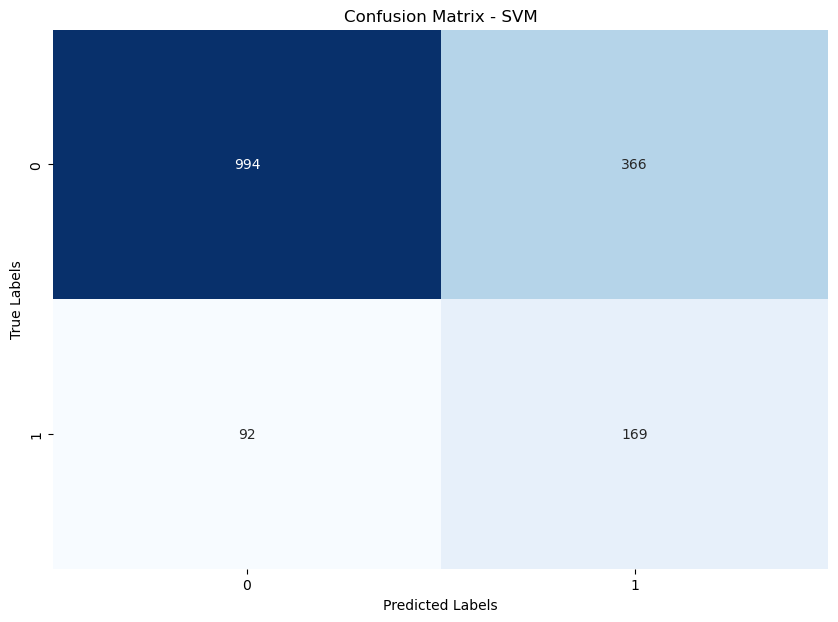

In [141]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()


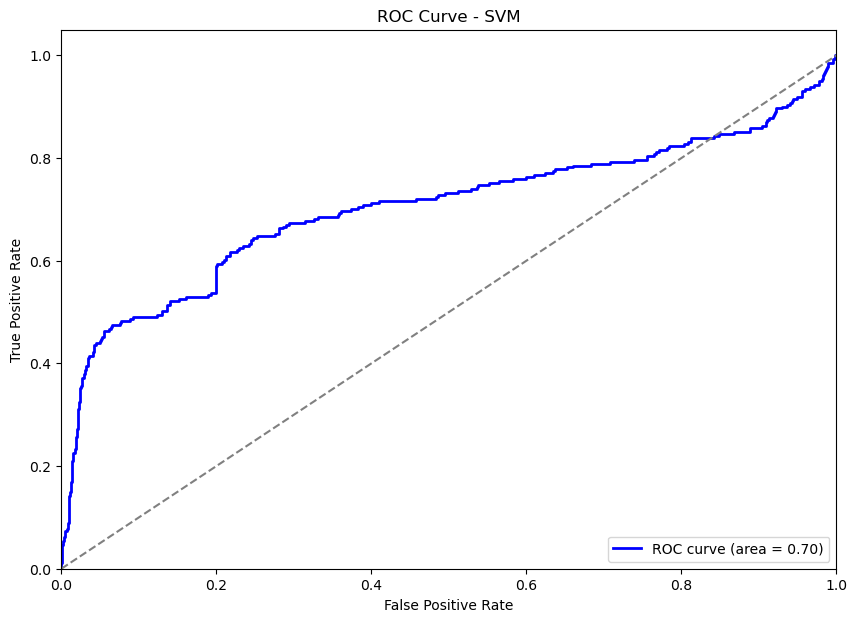

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kurva ROC
y_val_prob_svm = svm_model.predict_proba(X_val_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


## Model DecisionTreeClassifier

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, f1_score)

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_df, y_train)
dt_model

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             f1_score, precision_score, recall_score)

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_df, y_train)

# Prediksi model pada data pelatihan
y_train_pred_dt = dt_model.predict(X_train_df)

# Evaluasi model Decision Tree pada data pelatihan
print("Classification Report Decision Tree pada data pelatihan:\n", classification_report(y_train, y_train_pred_dt))
print("Akurasi Decision Tree pada data pelatihan:", accuracy_score(y_train, y_train_pred_dt))
print("AUC-ROC Decision Tree pada data pelatihan:", roc_auc_score(y_train, y_train_pred_dt))
print("F1-Score Decision Tree pada data pelatihan:", f1_score(y_train, y_train_pred_dt))
print("Precision Decision Tree pada data pelatihan:", precision_score(y_train, y_train_pred_dt))
print("Recall Decision Tree pada data pelatihan:", recall_score(y_train, y_train_pred_dt))


Classification Report Decision Tree pada data pelatihan:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5439
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480

Akurasi Decision Tree pada data pelatihan: 1.0
AUC-ROC Decision Tree pada data pelatihan: 1.0
F1-Score Decision Tree pada data pelatihan: 1.0
Precision Decision Tree pada data pelatihan: 1.0
Recall Decision Tree pada data pelatihan: 1.0


### Evaluasi Model

In [145]:
# Prediksi model pada validation set
y_val_pred_dt = dt_model.predict(X_val_df)

# Evaluasi model Decision Tree
print("Classification Report Decision Tree pada data validation:\n", classification_report(y_val, y_val_pred_dt))
print("Akurasi Decision Tree pada data validation:", accuracy_score(y_val, y_val_pred_dt))
print("AUC-ROC Decision Tree pada data validation:", roc_auc_score(y_val, y_val_pred_dt))
print("F1-Score Decision Tree pada data validation:", f1_score(y_val, y_val_pred_dt))
print("Precision Decision Tree pada data validation:", precision_score(y_val, y_val_pred_dt))
print("Recall Decision Tree pada data validation:", recall_score(y_val, y_val_pred_dt))

Classification Report Decision Tree pada data validation:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1360
           1       0.67      0.69      0.68       261

    accuracy                           0.90      1621
   macro avg       0.80      0.81      0.81      1621
weighted avg       0.90      0.90      0.90      1621

Akurasi Decision Tree pada data validation: 0.8951264651449723
AUC-ROC Decision Tree pada data validation: 0.8136550597250395
F1-Score Decision Tree pada data validation: 0.6804511278195489
Precision Decision Tree pada data validation: 0.6678966789667896
Recall Decision Tree pada data validation: 0.6934865900383141


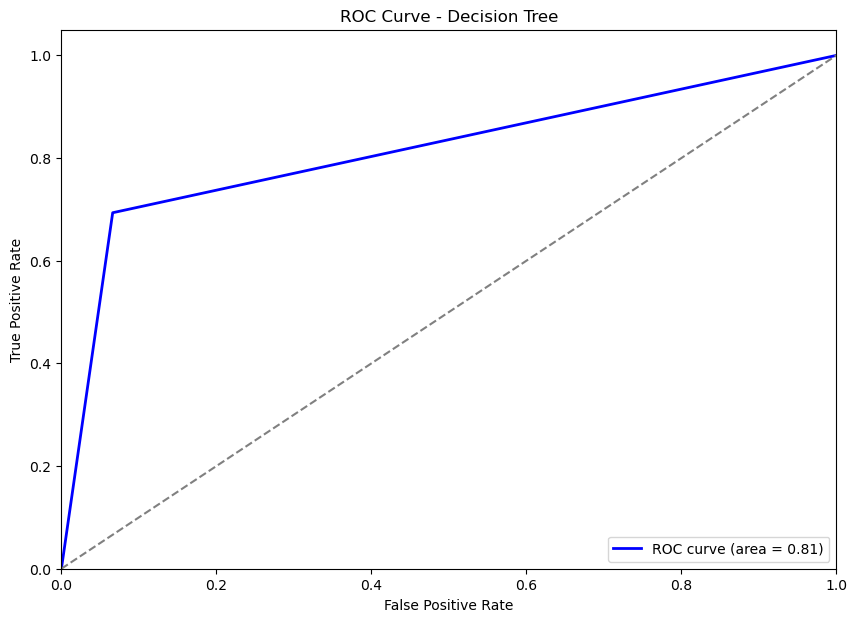

In [146]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kurva ROC
y_val_prob_dt = dt_model.predict_proba(X_val_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_val_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


# 6. Evaluasi  dan Analisis Semua Model
### Tabel Perbandingan Kinerja Model

| Model                | Akurasi | AUC-ROC | F1-Score | Precision | Recall |
|----------------------|---------|---------|----------|-----------|--------|
| Dummy Classifier     | 0.73    | 0.50    | 0.16     | 0.16      | 0.15   |
| Logistic Regression  | 0.81    | 0.81    | 0.57     | 0.45      | 0.80   |
| Random Forest        | 0.92    | 0.80    | 0.73     | 0.87      | 0.62   |
| SVM                  | 0.72    | 0.69    | 0.42     | 0.32      | 0.65   |
| Decision Tree        | 0.90    | 0.81    | 0.68     | 0.67      | 0.69   |

# Analisis Model Terbaik dengan Data Tidak Seimbang

### Random Forest
- **Akurasi**: 0.92
- **AUC-ROC**: 0.80
- **F1-Score**: 0.73
- **Precision**: 0.87
- **Recall**: 0.62

**Analisis**: Random Forest adalah model terbaik dalam hal F1-Score (0.73), yang merupakan metrik penting dalam kasus data tidak seimbang. Precision yang sangat tinggi (0.87) menunjukkan bahwa model ini memiliki tingkat kesalahan positif yang rendah, meskipun recall (0.62) bisa ditingkatkan lebih lanjut. F1-Score yang tinggi menunjukkan keseimbangan yang baik antara precision dan recall.

### Decision Tree
- **Akurasi**: 0.90
- **AUC-ROC**: 0.81
- **F1-Score**: 0.68
- **Precision**: 0.67
- **Recall**: 0.69

**Analisis**: Decision Tree juga menunjukkan kinerja yang baik dengan F1-Score (0.68) yang relatif tinggi. Precision (0.67) dan recall (0.69) yang seimbang menunjukkan bahwa model ini cukup efektif dalam memprediksi churn dengan sedikit trade-off antara precision dan recall.

### Logistic Regression
- **Akurasi**: 0.81
- **AUC-ROC**: 0.81
- **F1-Score**: 0.57
- **Precision**: 0.45
- **Recall**: 0.80

**Analisis**: Logistic Regression memiliki F1-Score (0.57) yang lebih rendah dibandingkan dengan Random Forest dan Decision Tree. Meskipun recall tinggi (0.80), precision yang lebih rendah (0.45) menunjukkan bahwa model ini cenderung menghasilkan banyak false positives.

### SVM
- **Akurasi**: 0.72
- **AUC-ROC**: 0.69
- **F1-Score**: 0.42
- **Precision**: 0.32
- **Recall**: 0.65

**Analisis**: SVM menunjukkan performa yang lebih rendah dengan F1-Score (0.42). Precision yang rendah (0.32) menunjukkan bahwa model ini sering menghasilkan false positives, meskipun recall (0.65) relatif baik.

### Dummy Classifier
- **Akurasi**: 0.73
- **AUC-ROC**: 0.50
- **F1-Score**: 0.16
- **Precision**: 0.16
- **Recall**: 0.15

**Analisis**: Dummy Classifier memiliki kinerja yang sangat buruk dengan F1-Score yang sangat rendah (0.16) dan nilai AUC-ROC yang sangat rendah (0.50). Ini menunjukkan bahwa model ini tidak berguna dalam memprediksi churn.

# Kesimpulan

Random Forest tetap menjadi model terbaik dalam hal F1-Score dan precision, sehingga merupakan pilihan utama untuk data tidak seimbang. Selanjutnya akan dilakukan tuning hyperparameter agar performa model lebih baik.


# 7.Tuning hyperparameters Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Parameter grid untuk RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # 'auto' diganti dengan 'sqrt'
    'bootstrap': [True, False]
}

# RandomizedSearchCV untuk mencari hyperparameter terbaik
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   n_iter=100, cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_df, y_train)

# Model dengan hyperparameter terbaik
best_rf_model = random_search.best_estimator_

# Prediksi model pada validation set
y_val_pred_rf = best_rf_model.predict(X_val_df)

# Evaluasi model Random Forest
print("Best Parameters Found: ", random_search.best_params_)
print("Classification Report Random Forest:\n", classification_report(y_val, y_val_pred_rf))
print("Akurasi Random Forest:", accuracy_score(y_val, y_val_pred_rf))
print("AUC-ROC Random Forest:", roc_auc_score(y_val, y_val_pred_rf))
print("F1-Score Random Forest:", f1_score(y_val, y_val_pred_rf))
print("Precision Model Random Forest:", precision_score(y_val, y_val_pred_rf))
print("Recall Model Random Forest:", recall_score(y_val, y_val_pred_rf))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters Found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1360
           1       0.75      0.79      0.77       261

    accuracy                           0.92      1621
   macro avg       0.86      0.87      0.86      1621
weighted avg       0.93      0.92      0.92      1621

Akurasi Random Forest: 0.9241209130166563
AUC-ROC Random Forest: 0.8696360153256705
F1-Score Random Forest: 0.7700934579439251
Precision Model Random Forest: 0.7518248175182481
Recall Model Random Forest: 0.789272030651341


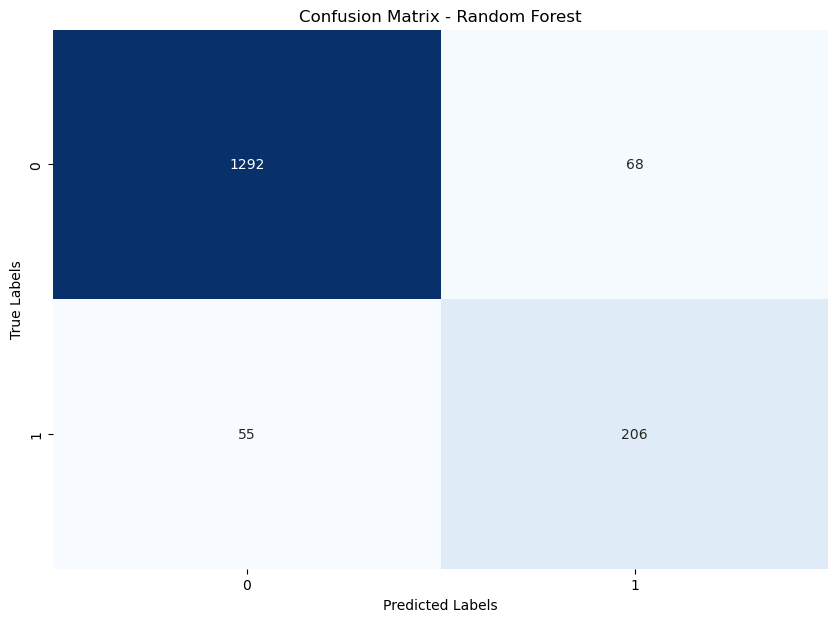

In [148]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_rf_val = confusion_matrix(y_val, y_val_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


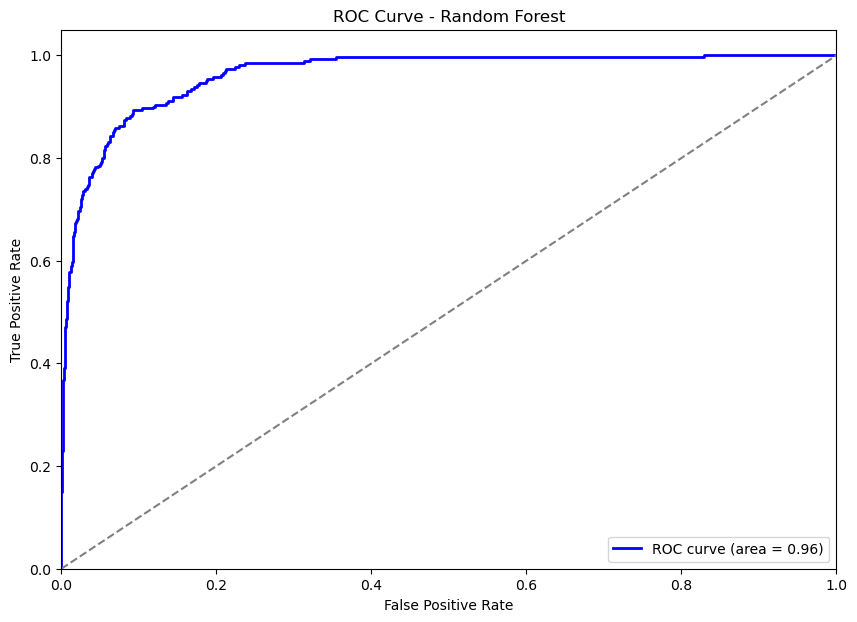

In [149]:
# Menghitung probabilitas prediksi untuk kurva ROC
y_val_prob_rf = best_rf_model.predict_proba(X_val_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_rf_val = auc(fpr_rf, tpr_rf)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


Evaluasi perbandingan baseline model dengan Random Forest yang sudah dituning di data validasi

In [150]:
import pandas as pd

# Data metrik performa
data = {
    'Metric': ['AUC-ROC Curve', 'F1-Score', 'Precision', 'Recall'],
    'DummyClassifier': [roc_auc_baseline_val,f1_score(y_val, y_val_pred_baseline, zero_division=0),
                        precision_score(y_val, y_val_pred_baseline, zero_division=0),recall_score(y_val, y_val_pred_baseline, zero_division=0)],
    'Random Forest': [roc_auc_rf_val, f1_score(y_val, y_val_pred_rf), precision_score(y_val, y_val_pred_rf),
                      recall_score(y_val, y_val_pred_rf)]
}

# Membuat DataFrame
df_metrics = pd.DataFrame(data)

# Menampilkan tabel
print(df_metrics)


          Metric  DummyClassifier  Random Forest
0  AUC-ROC Curve         0.505615       0.963494
1       F1-Score         0.155340       0.770093
2      Precision         0.157480       0.751825
3         Recall         0.153257       0.789272


# 8. Analisis Perbandingan DummyClassifier dan Random Forest (data validasi) dalam Prediksi Churn

- **DummyClassifier:**
  - Digunakan sebagai baseline, dengan performa mirip tebakan acak.
  - Nilai metrik yang rendah (AUC-ROC ≈ 0.5) menegaskan bahwa model ini tidak mampu memprediksi churn dengan baik.

- **Random Forest:**
  - Model terbaik dengan performa yang jauh lebih baik di semua metrik.
  - **AUC-ROC** tinggi (0.96) menunjukkan kemampuan yang kuat dalam membedakan churn.
  - **F1-Score** tinggi (0.73) menandakan keseimbangan antara precision dan recall, membuatnya efektif untuk prediksi churn.

**Kesimpulan:** Random Forest secara signifikan lebih baik daripada DummyClassifier untuk prediksi churn, menawarkan prediksi yang lebih akurat dan handal.


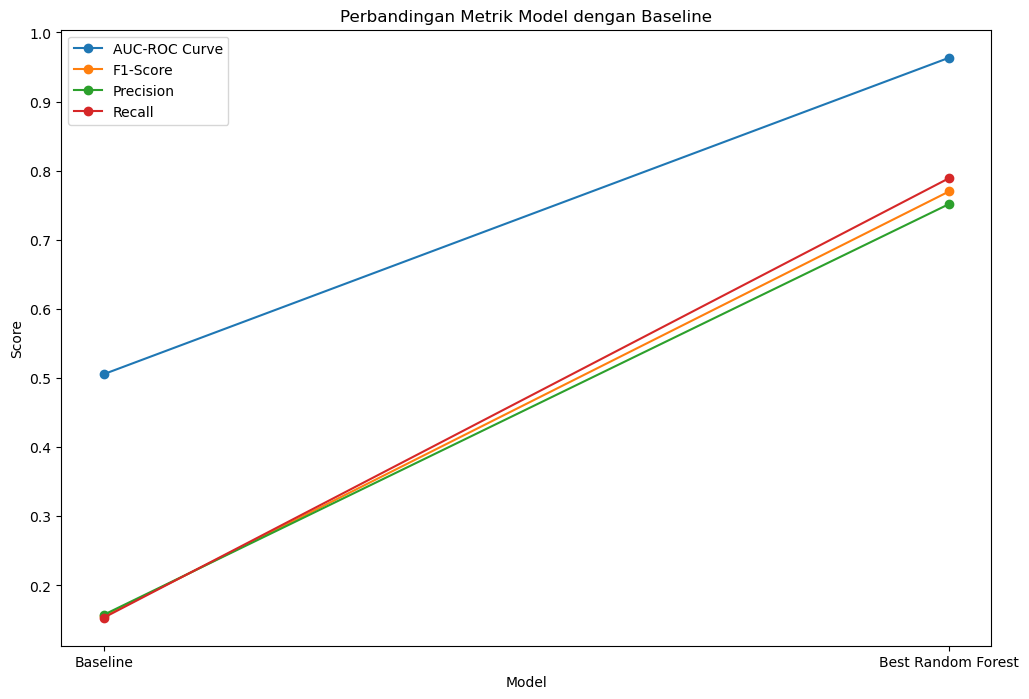

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membandingkan metrik model dengan baseline
metrics = {
    'Model': ['Baseline', 'Best Random Forest'],
    'AUC-ROC Curve': [roc_auc_baseline_val, roc_auc_rf_val],
    'F1-Score': [f1_score(y_val, y_val_pred_baseline, zero_division=0), f1_score(y_val, y_val_pred_rf)],
    'Precision': [precision_score(y_val, y_val_pred_baseline, zero_division=0), precision_score(y_val, y_val_pred_rf)],
    'Recall': [recall_score(y_val, y_val_pred_baseline, zero_division=0), recall_score(y_val, y_val_pred_rf)]
}

import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Plot perbandingan metrik
plt.figure(figsize=(12, 8))
for metric in ['AUC-ROC Curve', 'F1-Score', 'Precision', 'Recall']:
    plt.plot(metrics_df['Model'], metrics_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Metrik Model dengan Baseline')
plt.legend()
plt.show()


terlihat dari grafik peforma model meningkat lebih baik setelah menerapkan model Random Forest yang sudah dituning dibandingkan dengan model baseline (DummyClassifier)

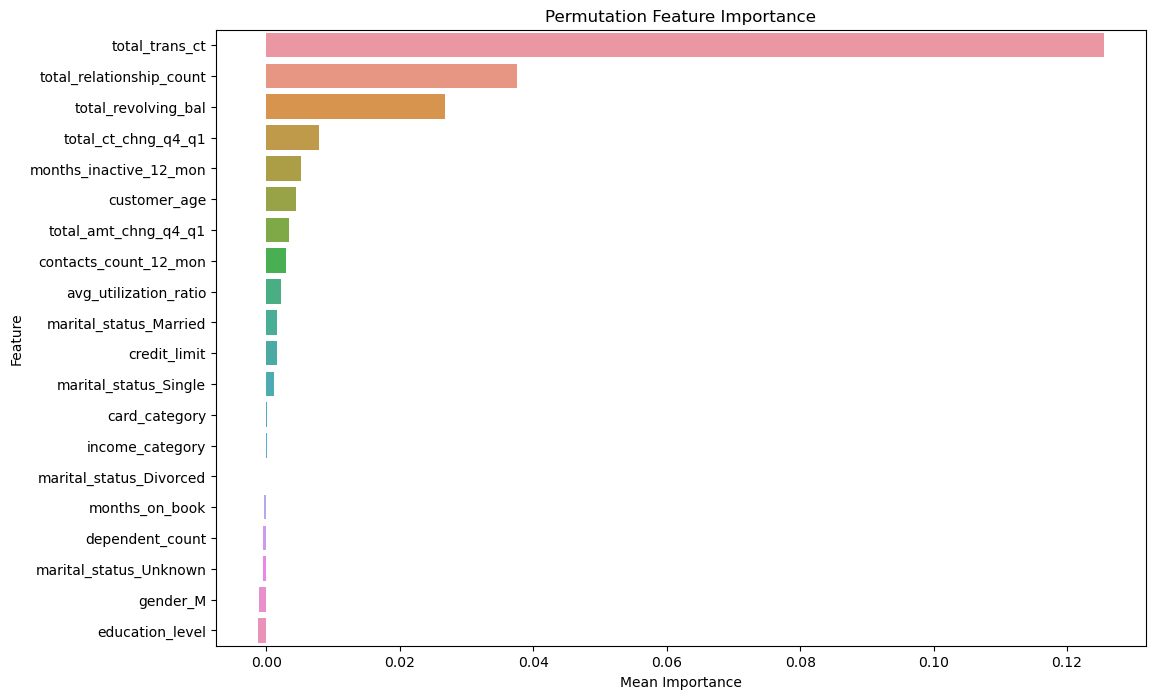

In [152]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung feature importance dengan permutation
result = permutation_importance(best_rf_model, X_val_df, y_val, n_repeats=10, random_state=42, n_jobs=-1)
importance_df = pd.DataFrame({'Feature': X_val_df.columns, 'Importance': result.importances_mean})

# Mengurutkan fitur berdasarkan importance dari yang tertinggi ke yang terendah
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()


Terlihat Feature yang paling berpengaruh dalam Churn adalah total trans_ct, total_relationship_count dan seterusnya

#### Analisis Hasil Permutation Feature Importance:
- **Apa yang Ditemukan:** Fitur dengan importance tinggi menunjukkan bahwa mereka memiliki dampak besar pada prediksi model dalam data validation. Ini membantu mengidentifikasi fitur yang paling berpengaruh dalam keputusan churn.
- **Rekomendasi:** Fokus pada fitur-fitur penting ini untuk strategi intervensi atau peningkatan layanan. contohnya feature `total_trans_ct` penting, pertimbangkan menawarkan insentif kepada pelanggan dengan transaksi tinggi untuk meningkatkan retensi mereka di platform.

In [153]:
!pip install scikit-learn


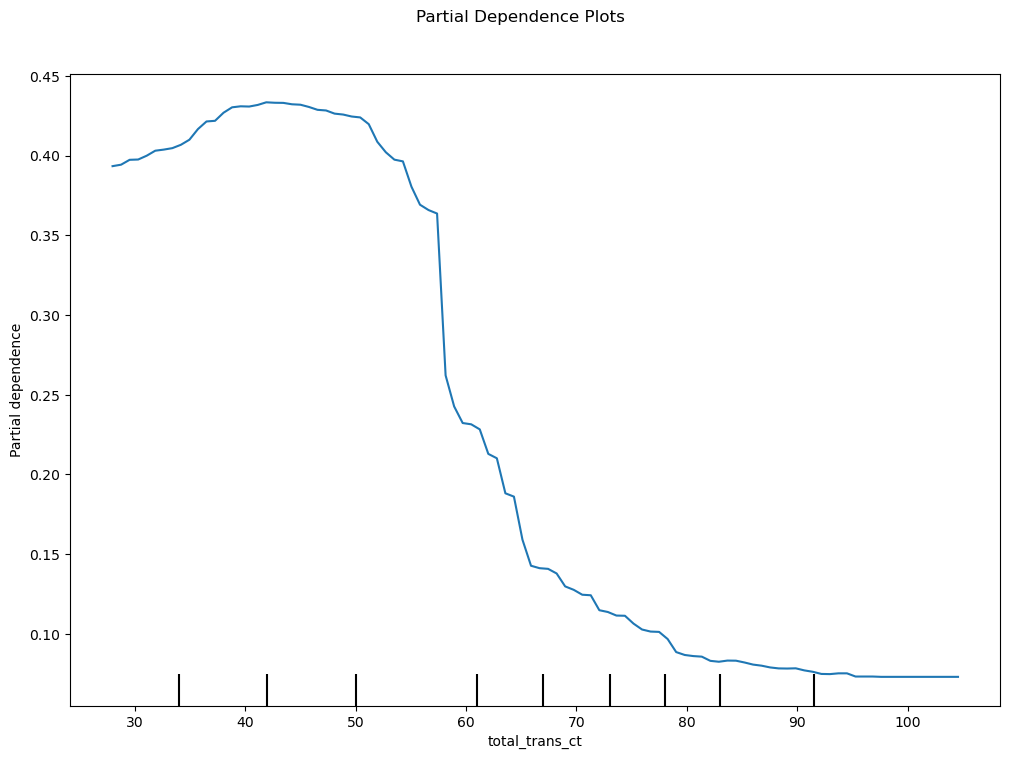

In [154]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pastikan 'total_trans_ct' ada di DataFrame X_val_df
features = ['total_trans_ct']  # Ganti dengan nama fitur yang relevan

# Pastikan X_val_df adalah DataFrame
if not isinstance(X_val_df, pd.DataFrame):
    X_val_df = pd.DataFrame(X_val_df, columns=[...])  # Ganti [...] dengan nama kolom yang sesuai

# Visualisasi Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    best_rf_model,
    X_val_df,
    features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust the title
plt.show()


#### Analisis Hasil Partial Dependence Plots (PDP):
- **Apa yang Ditemukan:** PDP menunjukkan bagaimana perubahan nilai fitur mempengaruhi hasil prediksi pada data validation. Jika grafik menunjukkan bahwa peningkatan `total_trans_ct` menurunkan probabilitas churn, ini mengindikasikan bahwa pelanggan yang aktif secara finansial lebih cenderung untuk tetap menggunakan layanan.
- **Rekomendasi:** Saran berbasis data untuk meningkatkan retensi pelanggan dapat mencakup menargetkan pelanggan dengan nilai fitur tertentu atau mengidentifikasi titik kritis di mana intervensi strategis dapat dilakukan.


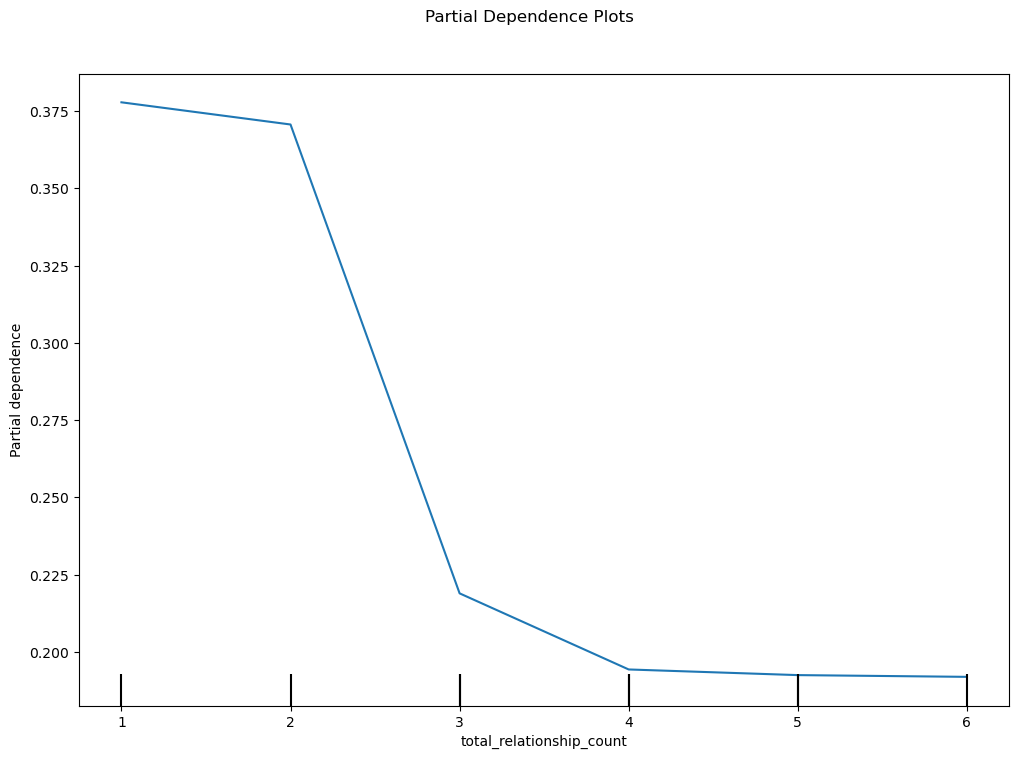

In [155]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pastikan 'total_relationship_count' ada di DataFrame X_val_df
features = ['total_relationship_count']  # Ganti dengan nama fitur yang relevan

# Pastikan X_val_df adalah DataFrame
if not isinstance(X_val_df, pd.DataFrame):
    X_val_df = pd.DataFrame(X_val_df, columns=[...])  # Ganti [...] dengan nama kolom yang sesuai

# Visualisasi Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    best_rf_model,
    X_val_df,
    features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust the title

### 2. Analisis dan Rekomendasi Berdasarkan PDP pada Data Validation

#### Analisis:
- **Hubungan Kausal:** Grafik menurun menunjukkan hubungan negatif antara `total_relationship_count` dan kemungkinan churn pada data test. Ini mengindikasikan bahwa pelanggan yang menggunakan lebih banyak layanan atau produk cenderung lebih puas atau memiliki keterikatan yang lebih tinggi.
- **Segmen Pelanggan:** Pelanggan dengan `total_relationship_count` yang lebih tinggi merupakan segmen yang lebih stabil. Jika fitur ini menunjukkan penurunan churn, maka pelanggan dengan keterlibatan tinggi adalah target utama untuk strategi retensi.

#### Rekomendasi:
- **Strategi Retensi:**
  - **Tingkatkan Keterlibatan:** Usahakan untuk meningkatkan keterlibatan pelanggan dengan menyediakan penawaran tambahan atau paket bundling produk. Jika pelanggan yang terlibat lebih jarang churn, maka meningkatkan keterlibatan dapat membantu mengurangi churn.
  - **Segmentasi dan Penawaran:** Segmentasikan pelanggan berdasarkan `total_relationship_count` dan berikan penawaran khusus atau layanan tambahan untuk pelanggan dengan keterlibatan rendah. Ini dapat mendorong mereka untuk lebih terlibat dengan platform.

- **Pengalaman Pelanggan:**
  - **Peningkatan Layanan:** Fokus pada peningkatan layanan untuk pelanggan yang sudah memiliki banyak hubungan dengan platform. Pelayanan yang baik dapat memastikan mereka tetap loyal.
  - **Program Loyalitas:** Kembangkan program loyalitas atau insentif bagi pelanggan dengan `total_relationship_count` yang tinggi untuk menjaga mereka tetap aktif dan puas.


## Evaluasi perbandingan baseline model dengan Random Forest yang sudah dituning di data test

In [156]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             f1_score, precision_score, recall_score)


# Inisialisasi DummyClassifier dengan strategy
baseline_model = DummyClassifier(strategy="stratified")
baseline_model.fit(X_train_df, y_train)

# Prediksi menggunakan baseline model DummyClassifier
y_test_pred_baseline = baseline_model.predict(X_test_df)

# Evaluasi baseline model dengan zero_division parameter
print("Classification Report Baseline Model (DummyClassifier) pada data test:\n", classification_report(y_test, y_test_pred_baseline, zero_division=0))
print("Akurasi Baseline Model (DummyClassifier) pada data test:", accuracy_score(y_test, y_test_pred_baseline))
print("AUC-ROC Baseline Model (DummyClassifier) pada data test:", roc_auc_score(y_test, y_test_pred_baseline))
print("F1-Score Baseline Model (DummyClassifier) pada data test:", f1_score(y_test, y_test_pred_baseline, zero_division=0))
print("Precision Baseline Model (DummyClassifier) pada data test:", precision_score(y_test, y_test_pred_baseline, zero_division=0))
print("Recall Baseline Model(DummyClassifier) pada data test:", recall_score(y_test, y_test_pred_baseline, zero_division=0))


Classification Report Baseline Model (DummyClassifier) pada data test:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1701
           1       0.17      0.18      0.17       325

    accuracy                           0.73      2026
   macro avg       0.51      0.51      0.51      2026
weighted avg       0.73      0.73      0.73      2026

Akurasi Baseline Model (DummyClassifier) pada data test: 0.7275419545903258
AUC-ROC Baseline Model (DummyClassifier) pada data test: 0.5054565187898521
F1-Score Baseline Model (DummyClassifier) pada data test: 0.17365269461077845
Precision Baseline Model (DummyClassifier) pada data test: 0.16909620991253643
Recall Baseline Model(DummyClassifier) pada data test: 0.17846153846153845


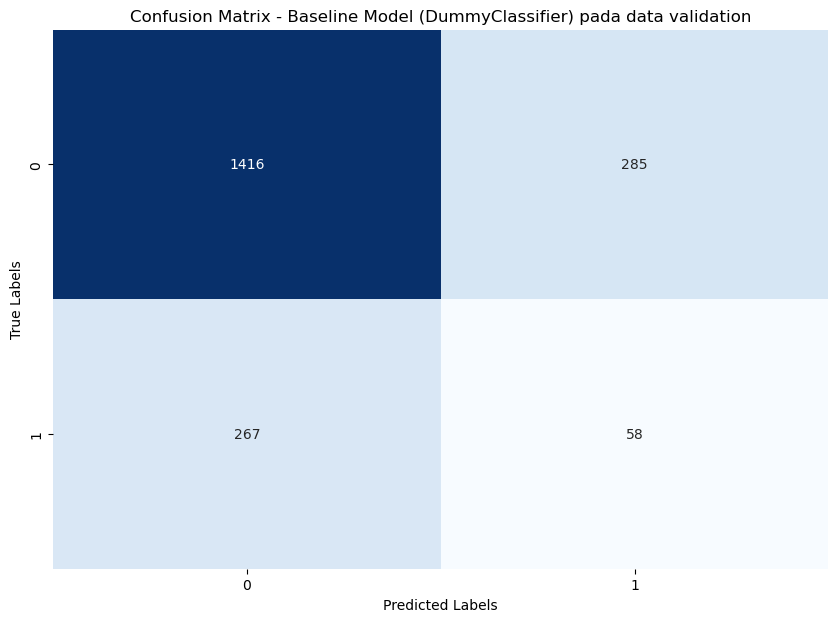

In [157]:
# Confusion Matrix
cm_baseline_test = confusion_matrix(y_test, y_test_pred_baseline)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_baseline_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Baseline Model (DummyClassifier) pada data validation')
plt.show()

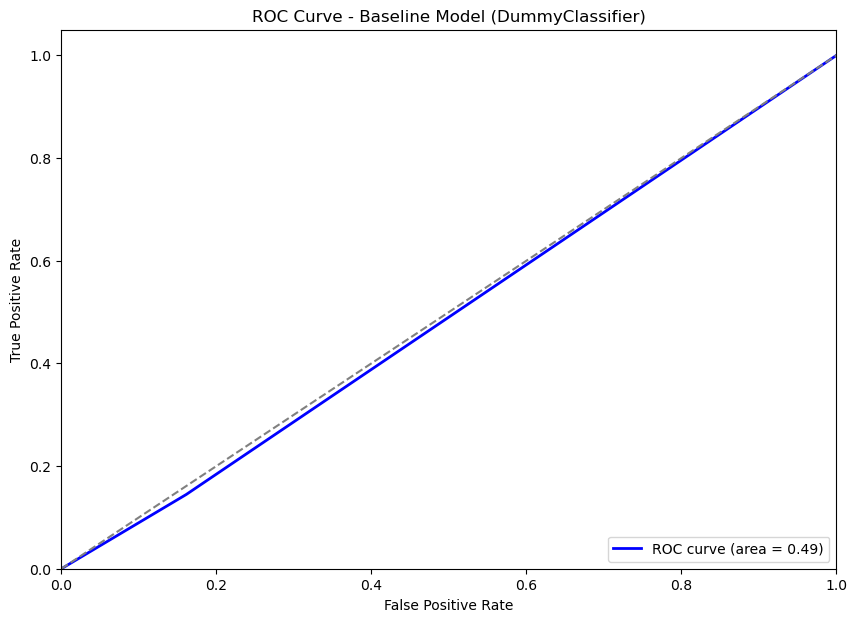

In [158]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi dari baseline model
y_test_prob_baseline = baseline_model.predict_proba(X_test_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob_baseline)
roc_auc_baseline_test = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_baseline_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Model (DummyClassifier)')
plt.legend(loc="lower right")
plt.show()

In [159]:
# Prediksi model pada test set random forest
y_test_pred_rf = best_rf_model.predict(X_test_df)

# Evaluasi model Random Forest
print("Best Parameters Found: ", random_search.best_params_)
print("Classification Report Random Forest pada data test:\n", classification_report(y_test, y_test_pred_rf))
print("Akurasi Random Forest pada data test:", accuracy_score(y_test, y_test_pred_rf))
print("AUC-ROC Random Forest pada data test:", roc_auc_score(y_test, y_test_pred_rf))
print("F1-Score Random Forest pada data test:", f1_score(y_test, y_test_pred_rf))
print("Precision Model Random Forest pada data test:", precision_score(y_test, y_test_pred_rf))
print("Recall Model Random Forest pada data test:", recall_score(y_test, y_test_pred_rf))


Best Parameters Found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Classification Report Random Forest pada data test:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1701
           1       0.73      0.78      0.75       325

    accuracy                           0.92      2026
   macro avg       0.84      0.86      0.85      2026
weighted avg       0.92      0.92      0.92      2026

Akurasi Random Forest pada data test: 0.918558736426456
AUC-ROC Random Forest pada data test: 0.8606493917605029
F1-Score Random Forest pada data test: 0.7533632286995515
Precision Model Random Forest pada data test: 0.7325581395348837
Recall Model Random Forest pada data test: 0.7753846153846153


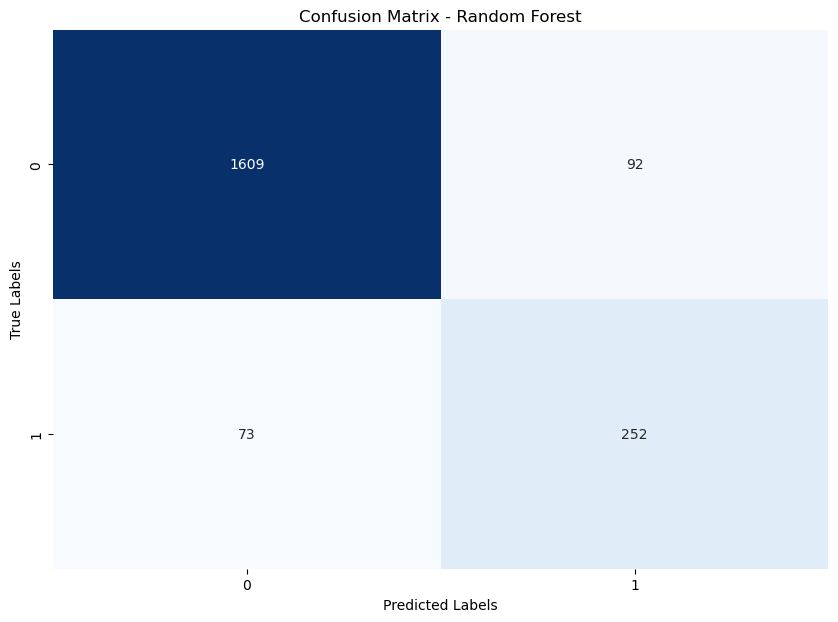

In [160]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

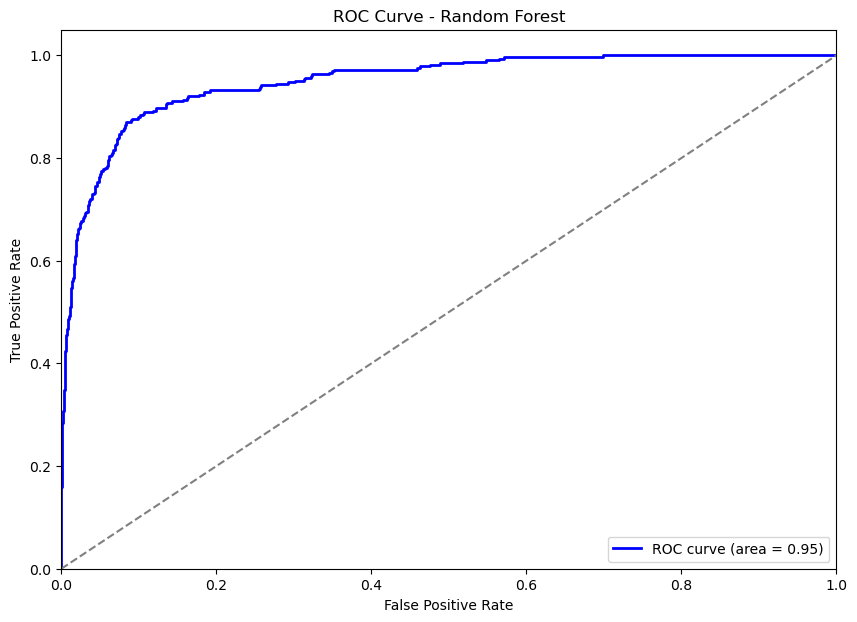

In [161]:
# Menghitung probabilitas prediksi untuk kurva ROC
y_test_prob_rf = best_rf_model.predict_proba(X_test_df)[:, 1]

# Menghitung ROC curve dan AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_rf_test = auc(fpr_rf, tpr_rf)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Evaluasi perbandingan baseline model dengan Random Forest yang sudah dituning di data test

In [162]:
import pandas as pd

# Data metrik performa
data2 = {
    'Metric': ['AUC-ROC Curve', 'F1-Score', 'Precision', 'Recall'],
    'DummyClassifier': [roc_auc_baseline_test,f1_score(y_test, y_test_pred_baseline, zero_division=0),
                        precision_score(y_test, y_test_pred_baseline, zero_division=0),recall_score(y_test, y_test_pred_baseline, zero_division=0) ],
    'Random Forest': [roc_auc_rf_test, f1_score(y_test, y_test_pred_rf), precision_score(y_test, y_test_pred_rf),
                      recall_score(y_test, y_test_pred_rf)]
}

# Membuat DataFrame
df_metrics2 = pd.DataFrame(data2)

# Menampilkan tabel
print(df_metrics2)


          Metric  DummyClassifier  Random Forest
0  AUC-ROC Curve         0.491767       0.949977
1       F1-Score         0.173653       0.753363
2      Precision         0.169096       0.732558
3         Recall         0.178462       0.775385


# 9.Analisis Perbandingan DummyClassifier dan Random Forest pada Data Test dalam Prediksi Churn

- **DummyClassifier:**
  - **AUC-ROC Curve** sekitar 0.5 menunjukkan bahwa model ini tidak lebih baik dari tebakan acak.
  - **F1-Score**, **Precision**, dan **Recall** yang rendah menegaskan bahwa model ini tidak efektif dalam memprediksi churn.

- **Random Forest:**
  - **AUC-ROC Curve** yang tinggi (0.95) menandakan model ini sangat baik dalam membedakan antara pelanggan yang churn dan tidak.
  - **F1-Score** tinggi (0.75) mencerminkan keseimbangan yang kuat antara precision dan recall.
  - **Precision** (0.73) dan **Recall** (0.78) menunjukkan bahwa model ini akurat dalam mengidentifikasi churn dan menangkap sebagian besar kasus churn.

**Kesimpulan:** Random Forest jauh lebih efektif dibandingkan DummyClassifier dalam memprediksi churn, dengan performa yang sangat baik pada semua metrik evaluasi.


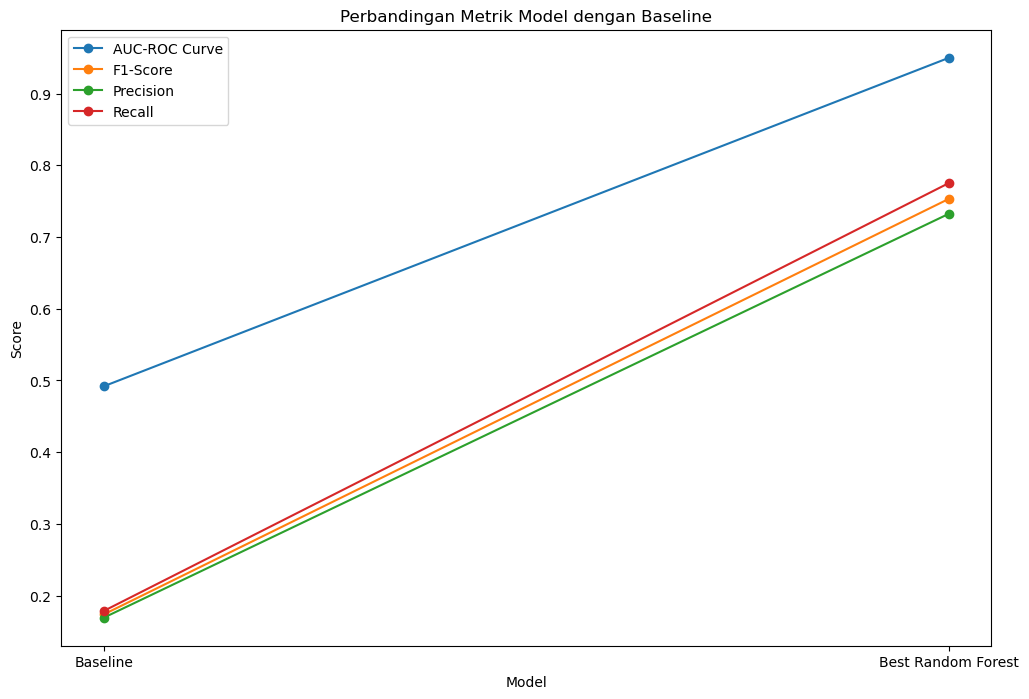

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membandingkan metrik model dengan baseline
metrics = {
    'Model': ['Baseline', 'Best Random Forest'],
    'AUC-ROC Curve': [roc_auc_baseline_test, roc_auc_rf_test],
    'F1-Score': [f1_score(y_test, y_test_pred_baseline, zero_division=0), f1_score(y_test, y_test_pred_rf)],
    'Precision': [precision_score(y_test, y_test_pred_baseline, zero_division=0), precision_score(y_test, y_test_pred_rf)],
    'Recall': [recall_score(y_test, y_test_pred_baseline, zero_division=0), recall_score(y_test, y_test_pred_rf)]
}

import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Plot perbandingan metrik
plt.figure(figsize=(12, 8))
for metric in ['AUC-ROC Curve', 'F1-Score', 'Precision', 'Recall']:
    plt.plot(metrics_df['Model'], metrics_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Metrik Model dengan Baseline')
plt.legend()
plt.show()




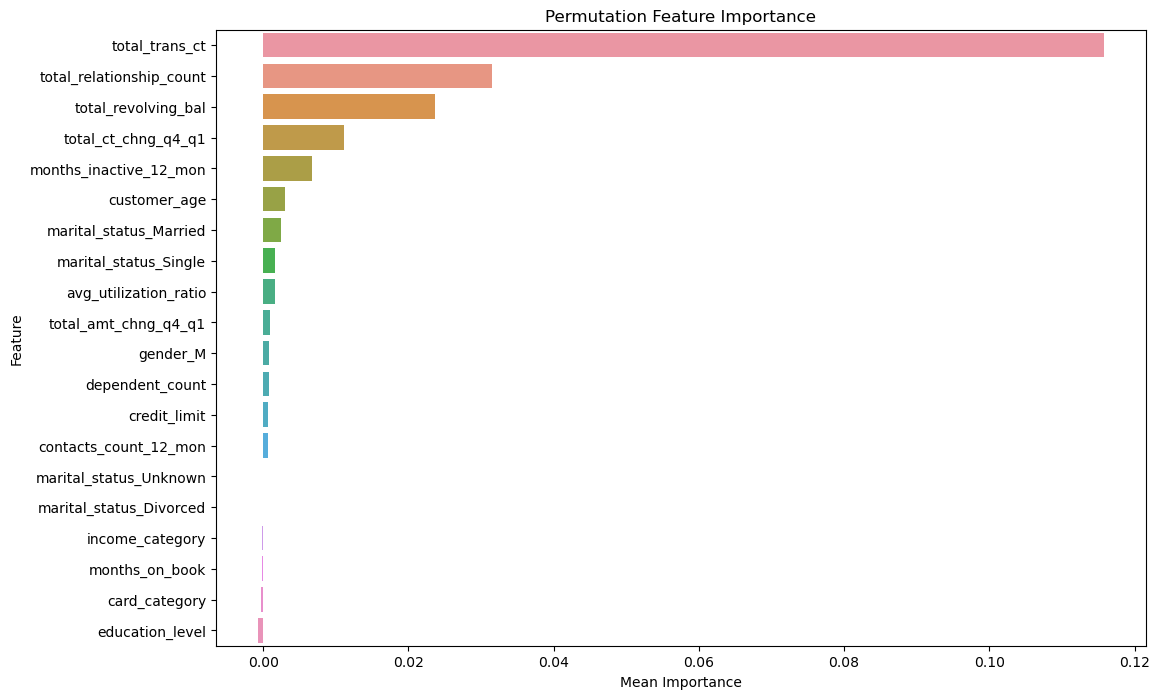

In [164]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung feature importance dengan permutation
result = permutation_importance(best_rf_model, X_test_df, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance_df = pd.DataFrame({'Feature': X_test_df.columns, 'Importance': result.importances_mean})

# Mengurutkan fitur berdasarkan importance dari yang tertinggi ke yang terendah
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()

Terlihat Feature yang paling berpengaruh dalam Churn adalah total trans_ct, total_relationship_count dan seterusnya

#### Analisis Hasil Permutation Feature Importance:
- **Apa yang Ditemukan:** Fitur dengan importance tinggi menunjukkan bahwa mereka memiliki dampak besar pada prediksi model dalam data validation. Ini membantu mengidentifikasi fitur yang paling berpengaruh dalam keputusan churn.
- **Rekomendasi:** Fokus pada fitur-fitur penting ini untuk strategi intervensi atau peningkatan layanan. contohnya feature `total_trans_ct` penting, pertimbangkan menawarkan insentif kepada pelanggan dengan transaksi tinggi untuk meningkatkan retensi mereka di platform.

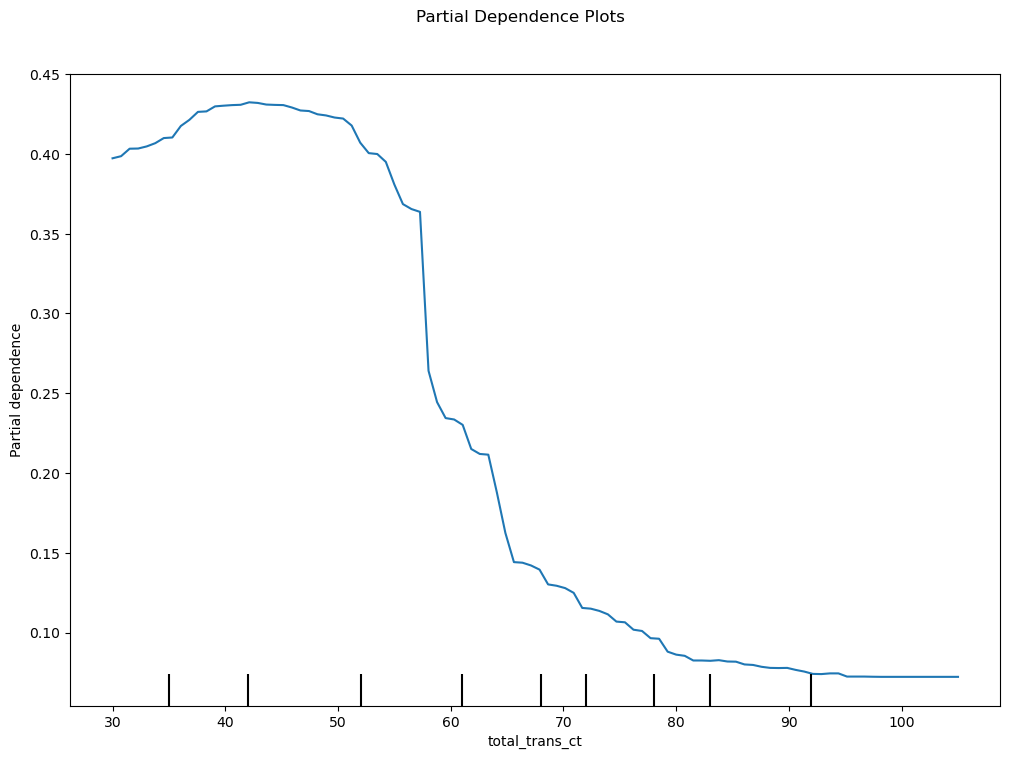

In [165]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pastikan 'total_trans_ct' ada di DataFrame X_test_df
features = ['total_trans_ct']  # Ganti dengan nama fitur yang relevan

# Pastikan X_test_df adalah DataFrame
if not isinstance(X_val_df, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test_df, columns=[...])  # Ganti [...] dengan nama kolom yang sesuai

# Visualisasi Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    best_rf_model,
    X_test_df,
    features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust the title
plt.show()




#### Analisis Hasil Partial Dependence Plots (PDP):
Hasilnya mirip dengan data validation
- **Apa yang Ditemukan:** PDP menunjukkan bagaimana perubahan nilai fitur mempengaruhi hasil prediksi pada data test. Pada grafik menunjukkan bahwa peningkatan `total_trans_ct` menurunkan probabilitas churn, ini mengindikasikan bahwa pelanggan yang aktif secara finansial lebih cenderung untuk tetap menggunakan layanan.
- **Rekomendasi:** Saran berbasis data untuk meningkatkan retensi pelanggan dapat mencakup menargetkan pelanggan dengan nilai fitur tertentu atau mengidentifikasi titik kritis di mana intervensi strategis dapat dilakukan.


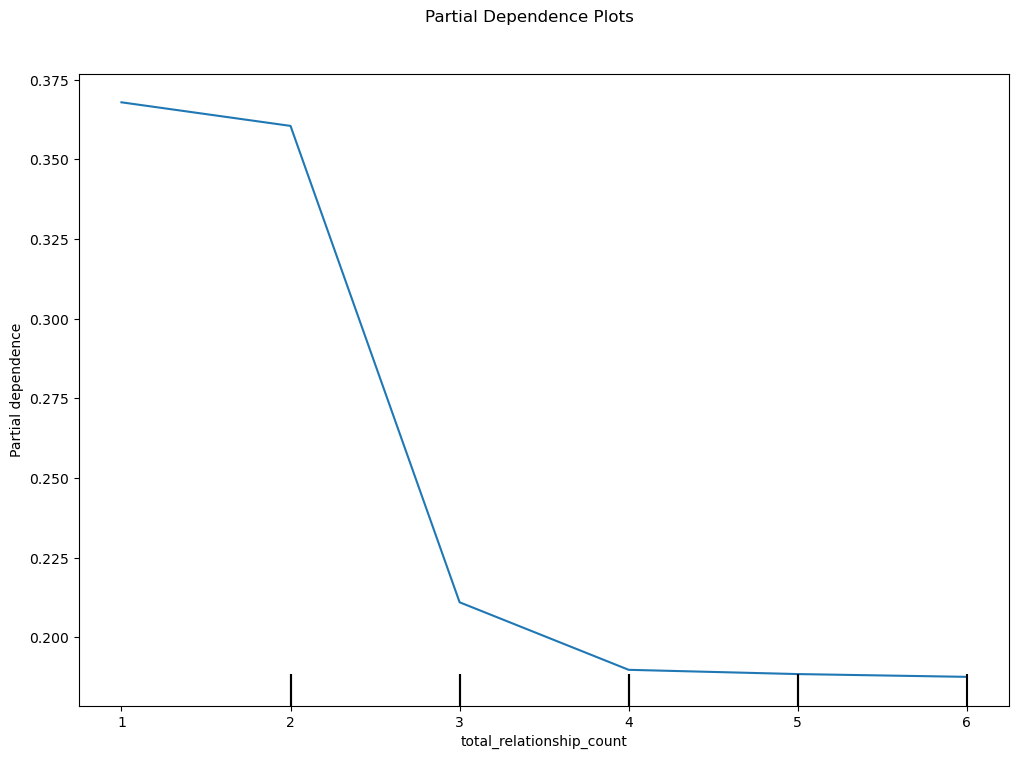

In [166]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pastikan 'total_relationship_count' ada di DataFrame X_test_df
features = ['total_relationship_count']  # Ganti dengan nama fitur yang relevan

# Pastikan X_test_df adalah DataFrame
if not isinstance(X_test_df, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test_df, columns=[...])  # Ganti [...] dengan nama kolom yang sesuai

# Visualisasi Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    best_rf_model,
    X_test_df,
    features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust the title

### 2. Analisis dan Rekomendasi Berdasarkan PDP pada Data Test

#### Analisis:
- **Hubungan Kausal:** Grafik menurun menunjukkan hubungan negatif antara `total_relationship_count` dan kemungkinan churn pada data test. Ini mengindikasikan bahwa pelanggan yang menggunakan lebih banyak layanan atau produk cenderung lebih puas atau memiliki keterikatan yang lebih tinggi.
- **Segmen Pelanggan:** Pelanggan dengan `total_relationship_count` yang lebih tinggi merupakan segmen yang lebih stabil. Jika fitur ini menunjukkan penurunan churn, maka pelanggan dengan keterlibatan tinggi adalah target utama untuk strategi retensi.

#### Rekomendasi:
- **Strategi Retensi:**
  - **Tingkatkan Keterlibatan:** Usahakan untuk meningkatkan keterlibatan pelanggan dengan menyediakan penawaran tambahan atau paket bundling produk. Jika pelanggan yang terlibat lebih jarang churn, maka meningkatkan keterlibatan dapat membantu mengurangi churn.
  - **Segmentasi dan Penawaran:** Segmentasikan pelanggan berdasarkan `total_relationship_count` dan berikan penawaran khusus atau layanan tambahan untuk pelanggan dengan keterlibatan rendah. Ini dapat mendorong mereka untuk lebih terlibat dengan platform.

- **Pengalaman Pelanggan:**
  - **Peningkatan Layanan:** Fokus pada peningkatan layanan untuk pelanggan yang sudah memiliki banyak hubungan dengan platform. Pelayanan yang baik dapat memastikan mereka tetap loyal.
  - **Program Loyalitas:** Kembangkan program loyalitas atau insentif bagi pelanggan dengan `total_relationship_count` yang tinggi untuk menjaga mereka tetap aktif dan puas.


# 9. Kesimpulan Analisis Model

#### 1. Perbandingan DummyClassifier dan Random Forest pada Data Test

- **DummyClassifier:**
  - **AUC-ROC Curve:** 0.49, menunjukkan bahwa model ini hampir setara dengan tebakan acak.
  - **F1-Score:** 0.17, menandakan performa yang sangat rendah dalam keseimbangan antara precision dan recall.
  - **Precision:** 0.17
  - **Recall:** 0.18

- **Random Forest:**
  - **AUC-ROC Curve:** 0.95, menunjukkan kemampuan model yang sangat baik dalam membedakan antara pelanggan yang churn dan tidak.
  - **F1-Score:** 0.75, mencerminkan keseimbangan yang kuat antara precision dan recall.
  - **Precision:** 0.73
  - **Recall:** 0.78

**Kesimpulan:** Random Forest jauh lebih efektif dibandingkan DummyClassifier dalam memprediksi churn, dengan performa yang sangat baik pada semua metrik evaluasi, termasuk F1-Score dan AUC-ROC Curve.

#### 2. Analisis dan Rekomendasi Berdasarkan PDP pada Data Test

- **Hubungan Kausal:** Grafik PDP menunjukkan bahwa peningkatan `total_relationship_count` mengurangi kemungkinan churn. Pelanggan dengan lebih banyak hubungan cenderung lebih puas dan memiliki keterikatan yang lebih tinggi.
  
- **Segmen Pelanggan:** Pelanggan dengan `total_relationship_count` yang tinggi merupakan target yang lebih stabil dan berpotensi lebih loyal.

**Rekomendasi:**
- **Strategi Retensi:**
  - **Tingkatkan Keterlibatan:** Berikan penawaran tambahan atau paket bundling produk untuk meningkatkan keterlibatan pelanggan.
  - **Segmentasi dan Penawaran:** Segmentasikan pelanggan berdasarkan `total_relationship_count` dan tawarkan layanan atau insentif khusus untuk meningkatkan keterlibatan pelanggan dengan jumlah hubungan rendah.

- **Pengalaman Pelanggan:**
  - **Peningkatan Layanan:** Fokus pada peningkatan layanan untuk pelanggan dengan banyak hubungan.
  - **Program Loyalitas:** Kembangkan program loyalitas atau insentif untuk pelanggan dengan `total_relationship_count` yang tinggi agar tetap aktif dan puas.

#### 3. Metrik untuk Meyakinkan Stakeholder

Untuk meyakinkan stakeholder tentang keunggulan model Random Forest, **AUC-ROC Curve** dan **F1-Score** adalah metrik utama yang dapat digunakan. Grafik AUC-ROC Curve untuk Random Forest (0.95) menunjukkan kemampuan model yang sangat baik dalam membedakan antara pelanggan yang churn dan tidak, sementara F1-Score (0.75) menandakan keseimbangan yang baik antara precision dan recall, jauh lebih baik daripada DummyClassifier yang memiliki AUC-ROC Curve mendekati 0.49 dan F1-Score 0.17.

#### 4. Analisis Model Menggunakan Permutation Feature Importance dan PDP

- **Permutation Feature Importance:**
  - **Fitur Penting:** `total_trans_ct` dan `total_relationship_count` memiliki pengaruh besar pada prediksi churn.
  - **Rekomendasi:** Fokus pada fitur-fitur ini dalam strategi retensi, seperti menawarkan insentif untuk pelanggan dengan transaksi tinggi.

- **Partial Dependence Plot (PDP):**
  - **Apa yang Ditemukan:** PDP menunjukkan bahwa pelanggan dengan `total_trans_ct` yang tinggi memiliki probabilitas churn yang lebih rendah.
  - **Rekomendasi:** Targetkan pelanggan dengan aktivitas transaksi tinggi dengan strategi retensi yang berbasis data.

Dengan analisis ini, stakeholder dapat melihat bahwa model Random Forest tidak hanya lebih efektif dalam memprediksi churn tetapi juga memberikan wawasan penting untuk meningkatkan strategi retensi pelanggan.
